In [2]:
library(pacman)

# Use pacman to load the packages
p_load(car)
p_load(dplyr)
p_load(tidyverse, VIM, mice, Hmisc, 
               DMwR, naniar)
p_load(stargazer)
p_load(openxlsx)
p_load(here)
p_load(rio)
p_load(ggplot2)
p_load(BSDA)
p_load(corrplot)
p_load(caTools)
p_load(keras)
p_load(reticulate)
p_load(readr)
p_load(writexl)
p_load(stringr)
p_load(caTools)
p_load(scales)
p_load(readxl)


In [8]:
py_install("tensorflow")

+ "C:/Users/angme/anaconda3/condabin/conda.bat" "install" "--yes" "--prefix" "C:/Users/angme/anaconda3" "-c" "conda-forge" "tensorflow"



Import File

In [5]:
dataset2 <- read_excel(here("dataSources", "videoGames", "Video game sales - 2000 - 2020.xlsx"))
attach(dataset2)

In [6]:
# Check the data
str(dataset2)
summary(dataset2)
names(dataset2)
head(dataset2, 5)

tibble [8,896 × 15] (S3: tbl_df/tbl/data.frame)
 $ title               : chr [1:8896] "(c 12) Final Resistance" ".hack  Sekai no Mukou ni   Versus" "007  Quantum of Solace" "007  Quantum of Solace" ...
 $ platform            : chr [1:8896] "PS" "PS3" "PS2" "PS3" ...
 $ genre               : chr [1:8896] "Shooter" "Fighting" "Shooter" "Shooter" ...
 $ publisher           : chr [1:8896] "IBM" "IBM" "Activision" "Activision" ...
 $ vg_score            : num [1:8896] 1 6 8 3 1 6 3 1 2 3 ...
 $ critic_score        : num [1:8896] 6.5 10 7.8 6.6 6.4 7 6.1 2 10 7 ...
 $ user_score          : num [1:8896] 4 6 4 10 1 7 8 5 3 1 ...
 $ total_shipped       : num [1:8896] 8 269 81 158 240 294 210 174 21 277 ...
 $ aisan_sales         : num [1:8896] 5.08 3 3 1.14 3 2.94 3 3.74 5.5 2.67 ...
 $ north_american_sales: num [1:8896] 1.1 1.86 0.17 0.43 0.51 2.3 0.3 1.98 4.74 2.37 ...
 $ japan_sales         : num [1:8896] 5.7 0.03 1.21 0.02 3.75 1.37 4.94 2.34 3.85 5.75 ...
 $ european_sales      : num [1:88

    title             platform            genre            publisher        
 Length:8896        Length:8896        Length:8896        Length:8896       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    vg_score       critic_score     user_score     total_shipped   
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   :  0.07  
 1st Qu.: 4.000   1st Qu.: 3.00   1st Qu.: 3.000   1st Qu.: 67.00  
 Median : 6.000   Median : 6.00   Median : 5.000   Median :146.00  
 Mean   : 6.121   Mean   : 5.71   Mean   : 5.502   Mean   :145.25  
 3rd Qu.: 8.500   3rd Qu.: 8.00   3rd Qu.: 8.000   3rd Qu.:224.00  
 Max.   :10.000   Max.   :10.00   Max.   :10.000   Ma

[1] "title"                "platform"             "genre"               
 [4] "publisher"            "vg_score"             "critic_score"        
 [7] "user_score"           "total_shipped"        "aisan_sales"         
[10] "north_american_sales" "japan_sales"          "european_sales"      
[13] "global_sales"         "Production Cost"      "release_year"

title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(c 12) Final Resistance,PS,Shooter,IBM,1,6.5,4,8,5.08,1.10,5.70,3.54,15.42,1.98,2002
.hack Sekai no Mukou ni Versus,PS3,Fighting,IBM,6,10.0,6,269,3.00,1.86,0.03,6.43,8.35,3.34,2012
007 Quantum of Solace,PS2,Shooter,Activision,8,7.8,4,81,3.00,0.17,1.21,2.22,4.03,2.05,2008
007 Quantum of Solace,PS3,Shooter,Activision,3,6.6,10,158,1.14,0.43,0.02,0.51,2.10,1.19,2008
007 The World is not Enough,PS,Shooter,Electronic Arts,1,6.4,1,240,3.00,0.51,3.75,0.35,5.53,1.50,2000


In [4]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Console = as.factor(Console),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    Genre = as.factor(Genre),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth),
    TotalSales = as.numeric(TotalSales)
  )

data ['NASales'] = NULL
data ['PALSales'] = NULL
data ['JapanSales'] = NULL
data ['OtherSales'] = NULL
data ['ReleaseDate'] = NULL
data ['LastUpdate'] = NULL
data ['VGChartzScore'] = NULL
data ['CriticScore'] = NULL
data ['UserScore'] = NULL

In [5]:
########################################################
# Calculate YearsSinceRelease
data$YearsSinceRelease <- 2023 - data$ReleaseYear

In [6]:
head(data,5)

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,6,Weekend,End of month,55460000,6
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,6,Weekend,End of month,42790000,3
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,3,Weekday,End of month,40000000,11
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,5,Weekday,End of month,36600000,6
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,3,Weekday,Beginning of month,33150000,13


In [7]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Noticed too many publishers (total 713 publishers) & developers (total 1564 developers)

Rank             Title           Console         Publisher 
             7623              4930                21               713 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1564                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2               500                14

Data Cleaning

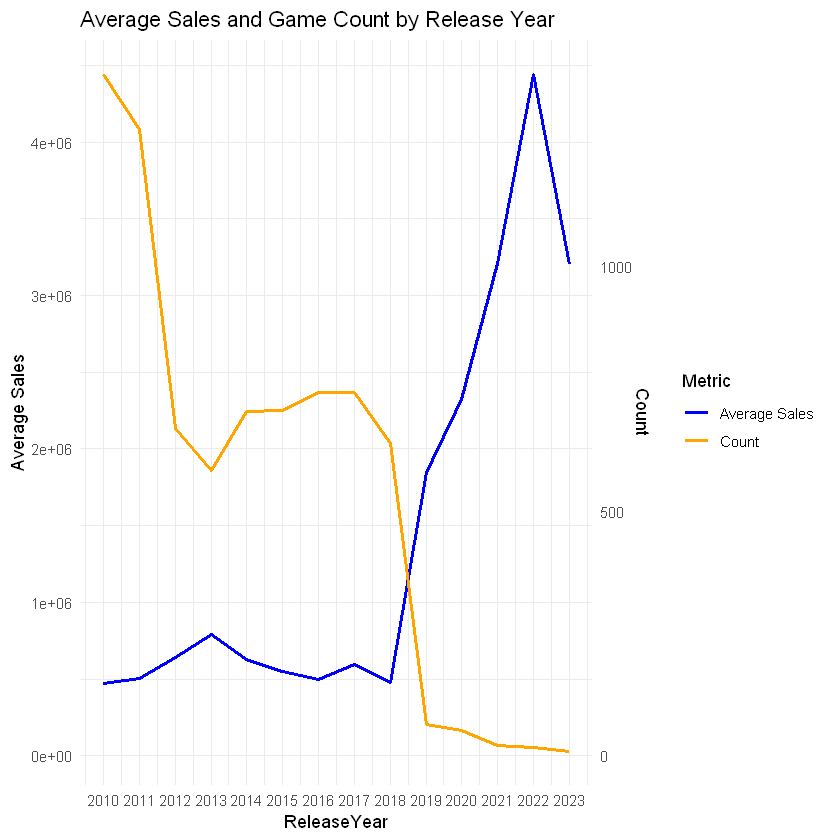

In [70]:
########################################################
# EDA - explore the dataset

# Calculate average sales and count of games released by year
summary_data <- data %>%
  group_by(ReleaseYear) %>%
  summarise(AvgSales = mean(TotalSales), Count = n())

# Define a scaling factor to make the Count values visible
count_scaling_factor <- max(summary_data$AvgSales) / max(summary_data$Count)

# Create a line graph
ggplot(summary_data, aes(x = ReleaseYear)) +
  geom_line(aes(y = AvgSales, color = "Average Sales"), size = 1) +
  geom_line(aes(y = Count * count_scaling_factor, color = "Count"), size = 1) +
  scale_color_manual(values = c("Average Sales" = "blue", "Count" = "orange")) +
  labs(title = "Average Sales and Game Count by Release Year",
       y = "Average Sales",
       color = "Metric") +
  theme_minimal() +
  scale_y_continuous(
    sec.axis = sec_axis(~./count_scaling_factor, name = "Count")
  ) +
  scale_x_continuous(breaks = unique(summary_data$ReleaseYear))

In [71]:
summary_data

ReleaseYear,AvgSales,Count
<int>,<dbl>,<int>
2010,469174.4,1393
2011,503859.4,1280
2012,639492.5,670
2013,790377.4,583
2014,628039.8,704
2015,550807.4,706
2016,501132.1,742
2017,594730.5,742
2018,478072.1,638


In [8]:
# Drop data from 2019 onwards to eliminate covid impact

data <- data %>%
  filter(ReleaseYear < 2019)

In [9]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank             Title           Console         Publisher 
             7458              4789                18               693 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1537                13                 9                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2               475                 9

Handle Outliers, Transform Y to be normally distributed

Warning message:
"Use of `data$TotalSales` is discouraged.
ℹ Use `TotalSales` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


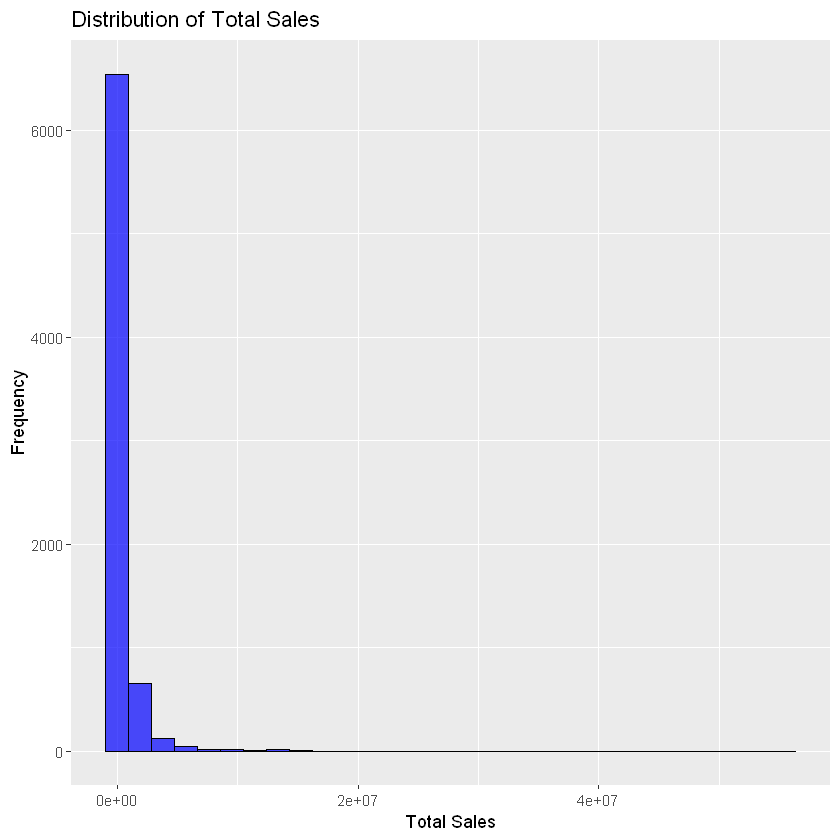

In [10]:
########################################################
# Check the distribution of dependent variable (TotalSales)

# Create a histogram using ggplot
ggplot(data, aes(x = data$TotalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Total Sales",
    x = "Total Sales",
    y = "Frequency"
  )

In [11]:
# Remove outliers

# Calculate the IQR for Total Sales
Q1 <- quantile(data$TotalSales, 0.25)
Q3 <- quantile(data$TotalSales, 0.75)
IQR_value <- Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Identify outliers
outliers <- data$TotalSales[data$TotalSales < lower_bound | data$TotalSales > upper_bound]

# Display the number of outliers removed
cat("Number of outliers removed:", length(outliers), "\n")

Number of outliers removed: 925 


In [12]:
data = data[!(data$TotalSales < lower_bound | data$TotalSales > upper_bound), ]

In [13]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank             Title           Console         Publisher 
             6533              4437                17               660 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1465                13                 9                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2                94                 9

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


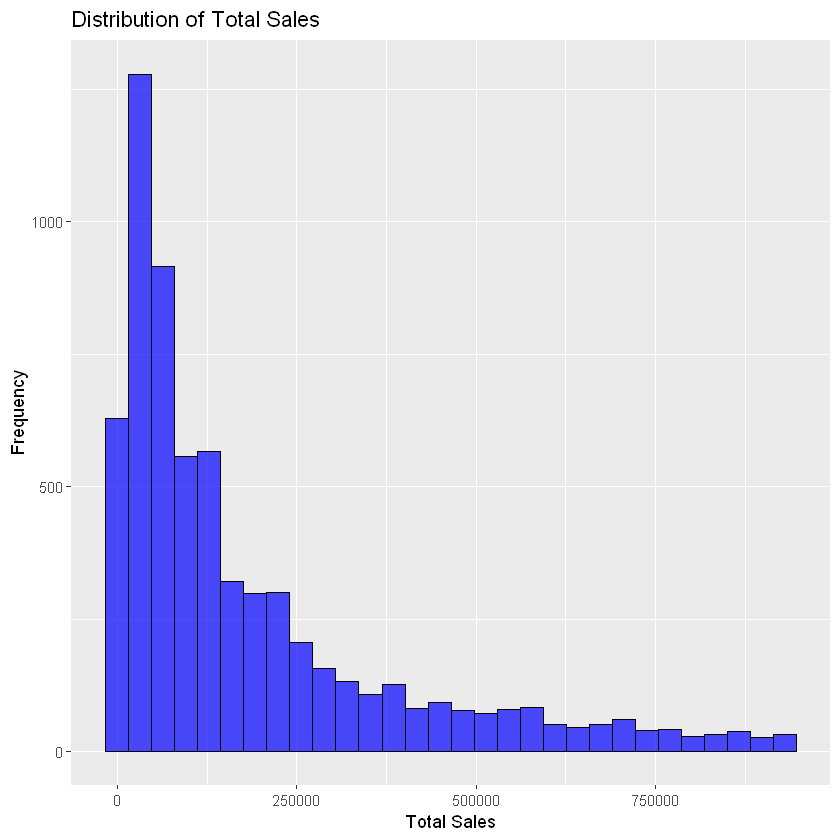

In [14]:
# Create a histogram using ggplot
ggplot(data, aes(x = data$TotalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Total Sales",
    x = "Total Sales",
    y = "Frequency"
  )

In [15]:
# Right-skewed: transform 'TotalSales' using log
data$log_transformed_total_sales <- log(data$TotalSales)

# Filter out infinite and missing values from the log-transformed variable
data <- data[is.finite(data$log_transformed_total_sales), ]

In [16]:
# Check for NA values in the log_transformed_total_sales column
na_count <- sum(is.na(data$log_transformed_total_sales))

# Check for NaN values in the log_transformed_total_sales column
nan_count <- sum(is.nan(data$log_transformed_total_sales))

# Check for Inf values in the log_transformed_total_sales column
inf_count <- sum(is.infinite(data$log_transformed_total_sales))

# Print the results
cat("Number of NA values in log_transformed_total_sales:", na_count, "\n")
cat("Number of NaN values in log_transformed_total_sales:", nan_count, "\n")
cat("Number of Inf values in log_transformed_total_sales:", inf_count, "\n")

Number of NA values in log_transformed_total_sales: 0 
Number of NaN values in log_transformed_total_sales: 0 
Number of Inf values in log_transformed_total_sales: 0 


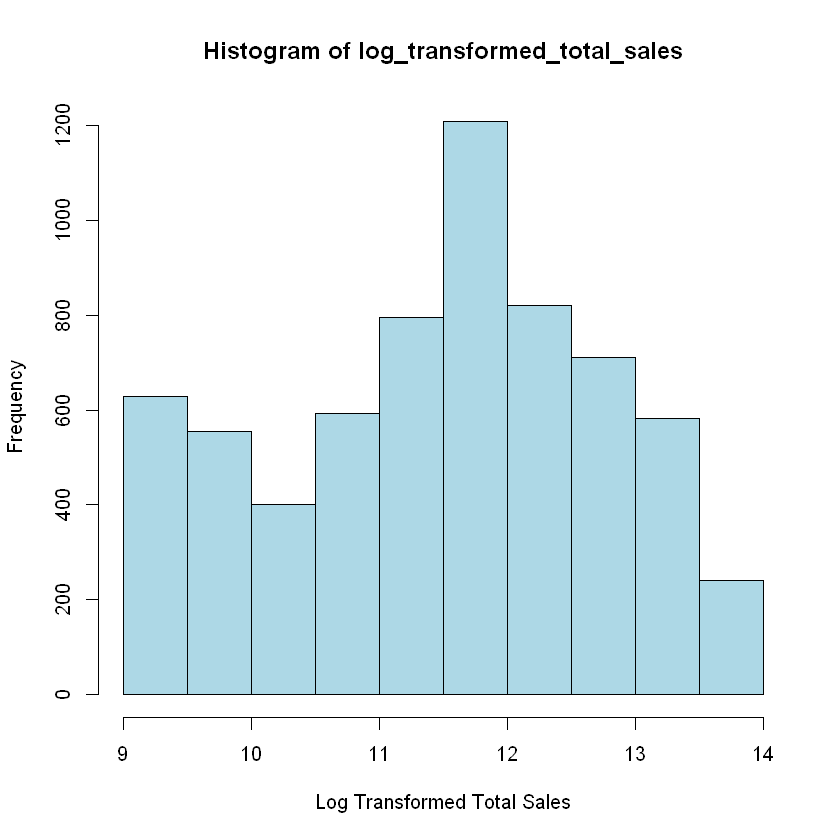

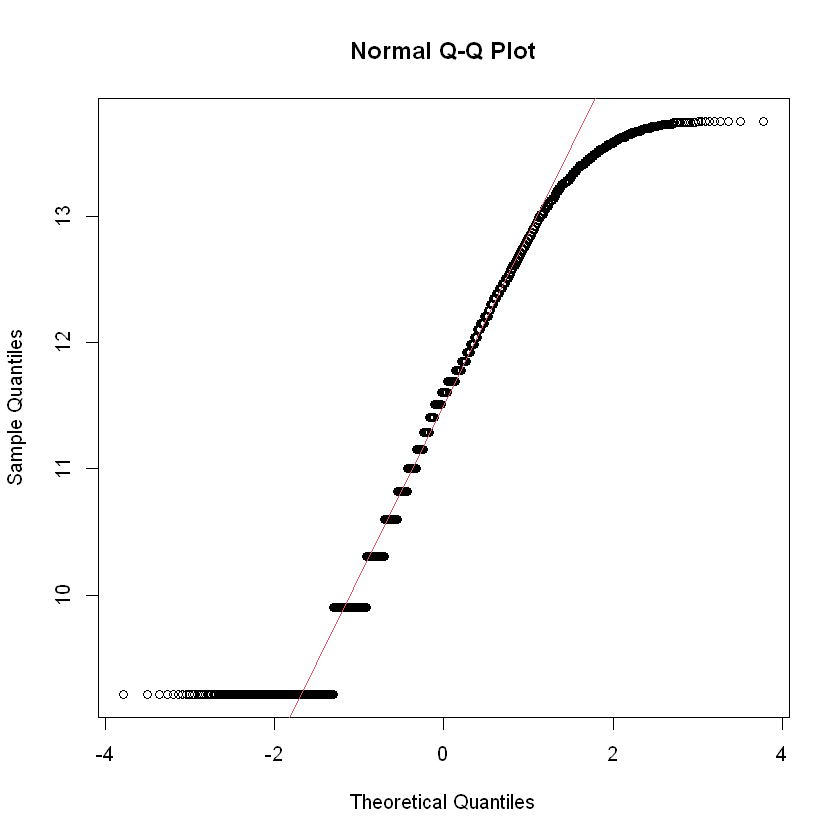

In [17]:
# Create a histogram for 'log_transformed_total_sales'
hist(data$log_transformed_total_sales, main="Histogram of log_transformed_total_sales", xlab="Log Transformed Total Sales", col="lightblue")

# Create a QQ plot for 'log_transformed_total_sales'
qqnorm(data$log_transformed_total_sales)
qqline(data$log_transformed_total_sales, col = 2)

# Display both the histogram and the QQ plot side by side
par(mfrow = c(2, 2))

,Rank,Title,Console,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease,log_transformed_total_sales,Publisher,Developer,
6072,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
349,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,374,486


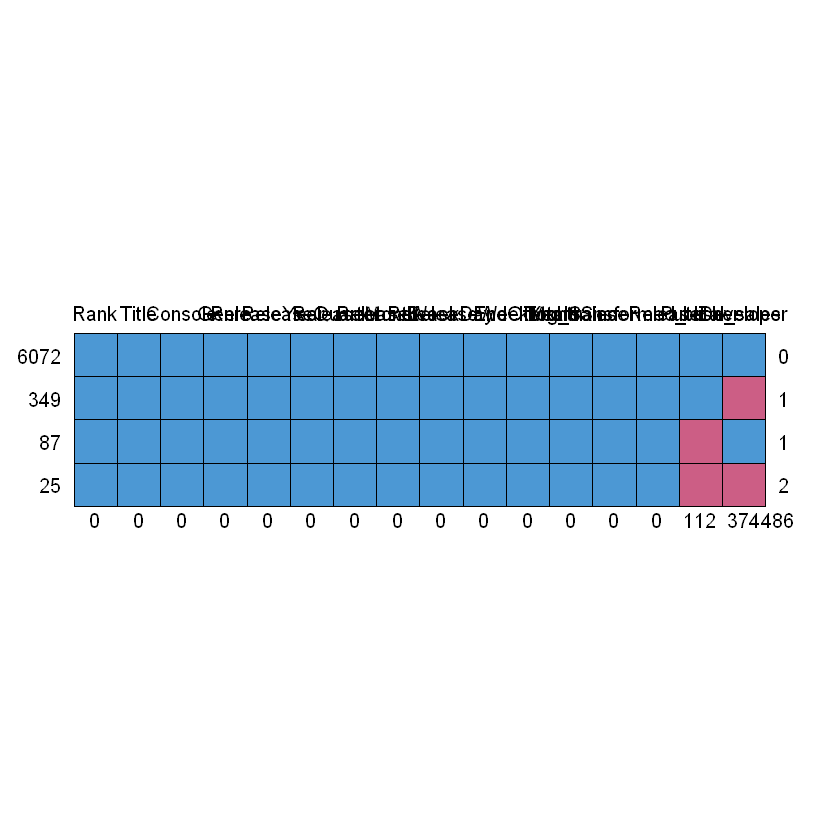

In [18]:
# Noted both Publisher & Developer also contains Unknown

# Replace 'Unknown' with NA
data$Developer[data$Developer == 'Unknown'] <- NA
data$Publisher[data$Publisher == 'Unknown'] <- NA

md.pattern(data)

In [ ]:
##### Little's Test #######
# Little's (1988) test statistic to assess if data is MCAR. 
# The null hypothesis (H0) : the data is MCAR

mcar_test(data)

In [20]:
# drop those records with Unknown

data = na.omit(data)

In [21]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank                       Title 
                       6072                        4051 
                    Console                   Publisher 
                         17                         624 
                  Developer                       Genre 
                       1430                          13 
                ReleaseYear              ReleaseQuarter 
                          9                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                          94 
          YearsSinceRelease log_transformed_total_sales 
                          9                          94

ANOVA test - Do Publisher & Developer have any significant impact on the sales revenue?
Note: Due to large amount of publishers & developers, we run one-way ANOVA test in order to minimize computing power required

In [22]:
########################################################
# Does Publisher have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Publisher" column
data$Publisher <- gsub("-", "_", data$Publisher)

In [23]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Publisher <- aov(log_transformed_total_sales ~ Publisher, data = data)
summary(anova.result_Publisher)

# p-value is less than 0.05, reject the null hypothesis - Publisher has an impact on the revenue

              Df Sum Sq Mean Sq F value Pr(>F)    
Publisher    623   3695   5.930   5.986 <2e-16 ***
Residuals   5448   5398   0.991                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [21]:
# Apply the Tukey HSD test
tukey_result = TukeyHSD(anova.result_Publisher)

In [22]:
# Change Tukey HSD test result to data frame
tukey_df <- as.data.frame(tukey_result$Publisher)

In [23]:
# Create a new column for Publisher names
tukey_df$Publisher <- rownames(tukey_df)

In [24]:
# View the dataframe
head(tukey_df,5)
names(tukey_df)

,diff,lwr,upr,p adj,Publisher
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
17_Bit-11 bit studios,1.2637194,-4.531326,7.058765,1.0000000,17_Bit-11 bit studios
1C Company-11 bit studios,0.6931472,-3.404569,4.790863,1.0000000,1C Company-11 bit studios
2K Games-11 bit studios,1.8698380,-1.107084,4.846759,0.9999990,2K Games-11 bit studios
2K Play-11 bit studios,1.4956368,-1.743892,4.735166,1.0000000,2K Play-11 bit studios
2K Sports-11 bit studios,1.8181419,-1.161791,4.798075,0.9999999,2K Sports-11 bit studios


[1] "diff"      "lwr"       "upr"       "p adj"     "Publisher"

In [25]:
# filter for p value < 0.05
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.05)

In [26]:
# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


In [27]:
# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

all_significant_publishers


[1] 135

[1] "5pb"                                   
  [2] "Aksys Games"                           
  [3] "Alchemist"                             
  [4] "Arc System Works"                      
  [5] "Avanquest Software"                    
  [6] "Bandai Namco Games"                    
  [7] "Big Ben Interactive"                   
  [8] "Big Fish Games"                        
  [9] "Bigben Interactive"                    
 [10] "Cave"                                  
 [11] "Compile Heart"                         
 [12] "CyberFront"                            
 [13] "D3 Publisher"                          
 [14] "D3Publisher"                           
 [15] "Destineer"                             
 [16] "Dramatic Create"                       
 [17] "DTP Entertainment"                     
 [18] "Entergram"                             
 [19] "Focus Multimedia"                      
 [20] "FuRyu Corporation"                     
 [21] "Graffiti"                              
 [22] "Idea Factory"                          
 [23] "Irem Software Engineering"             
 [24] "Kadokawa Games"                        
 [25] "Kadokawa Shoten"                       
 [26] "Kalypso Media"                         
 [27] "Koei Tecmo"                            
 [28] "Little Orbit"                          
 [29] "Maximum Games"                         
 [30] "Merge Games"                           
 [31] "Microids"                              
 [32] "Milestone S.r.l."                      
 [33] "Namco Bandai Games"                    
 [34] "Nighthawk Interactive"                 
 [35] "Nippon Ichi Software"                  
 [36] "NIS America"                           
 [37] "Nordic Games"                          
 [38] "O_Games"                               
 [39] "Outright Games"                        
 [40] "Paradox Interactive"                   
 [41] "PQube"                                 
 [42] "Prototype"                             
 [43] "Quinrose"                              
 [44] "Rising Star Games"                     
 [45] "Russel"                                
 [46] "Soedesco"                              
 [47] "Storm City Games"                      
 [48] "System Soft"                           
 [49] "Tecmo Koei"                            
 [50] "THQ Nordic"                            
 [51] "Tru Blu Entertainment"                 
 [52] "UFO Interactive"                       
 [53] "Wired Productions"                     
 [54] "Zoo Games"                             
 [55] "Bethesda Softworks"                    
 [56] "Disney Interactive Studios"            
 [57] "EA Sports"                             
 [58] "Electronic Arts"                       
 [59] "Nintendo"                              
 [60] "Square Enix"                           
 [61] "THQ"                                   
 [62] "Warner Bros. Interactive Entertainment"
 [63] "Activision"                            
 [64] "Atari"                                 
 [65] "Atlus"                                 
 [66] "Bandai Namco Entertainment"            
 [67] "Capcom"                                
 [68] "City Interactive"                      
 [69] "Codemasters"                           
 [70] "Crave Entertainment"                   
 [71] "Daedalic Entertainment"                
 [72] "Deep Silver"                           
 [73] "Double Fine Productions"               
 [74] "Focus Home Interactive"                
 [75] "Frontier Developments"                 
 [76] "GameMill"                              
 [77] "Gearbox Software"                      
 [78] "Konami"                                
 [79] "Konami Digital Entertainment"          
 [80] "Level 5"                               
 [81] "LucasArts"                             
 [82] "Majesco"                               
 [83] "Microsoft Studios"                     
 [84] "Mojang"                                
 [85] "MTV Games"                             
 [86] "

In [24]:
########################################################
# Does Developer have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Developer" column
data$Developer <- gsub("-", "_", data$Developer)

In [25]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Developer = aov(log_transformed_total_sales ~ Developer,data=data)
summary(anova.result_Developer)

# p-value is less than 0.05, reject the null hypothesis - Developer has an impact on the revenue


              Df Sum Sq Mean Sq F value Pr(>F)    
Developer   1429   4743   3.319   3.543 <2e-16 ***
Residuals   4642   4349   0.937                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [30]:
# Apply the Tukey HSD test
tukey_result_Developer = TukeyHSD(anova.result_Developer)

In [31]:
# Change Tukey HSD test result to data frame
tukey_df_Developer <- as.data.frame(tukey_result_Developer$Developer)

# Create a new column for Developer names
tukey_df_Developer$Developer <- rownames(tukey_df_Developer)

In [32]:
# filter for p value < 0.00025
significant_tukey_df_Developer <- tukey_df_Developer %>%
  filter(`p adj` < 0.00025)

In [33]:
# Split the "Developer" column into two columns
significant_tukey_df_Developer <- significant_tukey_df_Developer %>%
  separate(Developer, into = c("Developer1", "Developer2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant developers
all_significant_developers <- unique(significant_tukey_df_Developer$Developer1)

# Remove NAs (if any)
all_significant_developers <- all_significant_developers[!is.na(all_significant_developers)]
length (all_significant_developers)

all_significant_developers

[1] 120

[1] "Big Fish Games"           "Dramatic Create"         
  [3] "Idea Factory"             "QuinRose"                
  [5] "EA Canada"                "EA Tiburon"              
  [7] "Traveller's Tales"        "Arkane Studios"          
  [9] "Atlus"                    "Avalanche Software"      
 [11] "BioWare Corp."            "Codemasters"             
 [13] "Codemasters Birmingham"   "CyberConnect2"           
 [15] "Dimps Corporation"        "EA Bright Light"         
 [17] "EA Vancouver"             "Eidos Montreal"          
 [19] "Exient Entertainment"     "Gearbox Software"        
 [21] "High Moon Studios"        "Infinity Ward"           
 [23] "Intelligent Systems"      "IO Interactive"          
 [25] "Kojima Productions"       "Konami"                  
 [27] "Level 5"                  "MachineGames"            
 [29] "Omega Force"              "PlatinumGames"           
 [31] "SCE San Diego Studio"     "Sega"                    
 [33] "Square Enix"              "Tango Gameworks"         
 [35] "The Sims Studio"          "THQ"                     
 [37] "Toys for Bob"             "TT Fusion"               
 [39] "Ubisoft Montreal"         "Vicarious Visions"       
 [41] "Visual Concepts"          "Yuke's"                  
 [43] "Alchemist"                "Capcom"                  
 [45] "Firaxis Games"            "From Software"           
 [47] "Giants Software"          "Rebellion Developments"  
 [49] "Ubisoft"                  "Entergram"               
 [51] "Cave"                     "CyberFront"              
 [53] "FuRyu"                    "GSP"                     
 [55] "Kadokawa Games"           "Kadokawa Shoten"         
 [57] "KING Art Games"           "Koei Tecmo Games"        
 [59] "Little Orbit"             "Microids"                
 [61] "Nippon Ichi Software"     "Otomate"                 
 [63] "Prototype"                "Success"                 
 [65] "Crytek"                   "Team Ninja"              
 [67] "Ubisoft Montpellier"      "EA DICE"                 
 [69] "Griptonite Games"         "Harmonix Music Systems"  
 [71] "id Software"              "JAKKS Pacific"           
 [73] "Marvelous Entertainment"  "Monolith Soft"           
 [75] "Ninja Theory"             "PES Productions"         
 [77] "Pipeworks Software, Inc." "Spike"                   
 [79] "Sumo Digital"             "Telltale Games"          
 [81] "Ubisoft Reflections"      "Vigil Games"             
 [83] "EKO Software"             "Experience Inc."         
 [85] "FuRyu Corporation"        "Games Farm"              
 [87] "Gust"                     "Gusto Games"             
 [89] "HB Studios"               "HuneX"                   
 [91] "Inti Creates"             "Koei"                    
 [93] "Kylotonn Entertainment"   "Milestone S.r.l"         
 [95] "Milestone S.r.l."         "Monkey Bar Games"        
 [97] "Namco Bandai Games"       "Nippon Columbia"         
 [99] "Outright Games"           "Russel"                  
[101] "Spike Chunsoft"           "Starfish SD"             
[103] "Storm City Games"         "Studio Saizensen"        
[105] "System Soft"              "Tecmo Koei Games"        
[107] "Torus Games"              "UFO Interactive"         
[109] "UIG Entertainment"        "Weappy Studio"           
[111] "WizarBox"                 "Zoo Games"               
[113] "Nihon Falcom Corporation" "PopCap Games"            
[115] "Slightly Mad Studios"     "Volition Inc."           
[117] "WayForward Technologies"  "Zoe Mode"                
[119] "Supermassive Games Ltd."  "United Front Games"

Group Publisher & Developer

In [34]:
########################################################
# Explore grouping Publisher & Developer into Top 25 based on count frequency
'''
# Calculate the frequency of each Publisher
publisher_counts <- data %>%
  count(Publisher) %>%
  arrange(desc(n))

# Calculate the frequency of each Developer
developer_counts <- data %>%
  count(Developer) %>%
  arrange(desc(n))

# Extract the top 25 unique publishers and developers based on count frequency
top_publishers <- publisher_counts$Publisher %>%
  unique() %>%
  head(25)

top_developers <- developer_counts$Developer %>%
  unique() %>%
  head(25)

# View the top 25
print(top_publishers)
print(top_developers)
'''

 [1] "Namco Bandai Games"                    
 [2] "Activision"                            
 [3] "Ubisoft"                               
 [4] "Sega"                                  
 [5] "Tecmo Koei"                            
 [6] "Capcom"                                
 [7] "Electronic Arts"                       
 [8] "Namco Bandai"                          
 [9] "Warner Bros. Interactive Entertainment"
[10] "THQ"                                   
[11] "Konami"                                
[12] "Square Enix"                           
[13] "Nintendo"                              
[14] "Sony Computer Entertainment"           
[15] "EA Sports"                             
[16] "Konami Digital Entertainment"          
[17] "NIS America"                           
[18] "Deep Silver"                           
[19] "Idea Factory"                          
[20] "505 Games"                             
[21] "Focus Home Interactive"                
[22] "Atlus"                      

In [26]:
# Noted Data Inconsistencies under both Publisher & Developer columns
# Re-run Data Processing - to clean up data inconsistencies prior to grouping top 25

# Change 'Publisher' column to character
data$Publisher <- as.character(data$Publisher)

# Replace specified values
data$Publisher <- gsub('Namco Bandai Games|Namco Bandai|Namco|Namco Networks America Inc.', 'Bandai Namco', data$Publisher)
data$Publisher <- gsub('Warner Bros. Interactive Entertainment', 'Warner Bros. Interactive', data$Publisher)
data$Publisher <- gsub('Konami Digital Entertainment', 'Konami', data$Publisher)
data$Publisher <- gsub('THQ Nordic', 'THQ', data$Publisher)
data$Publisher <- gsub('Sony Computer Entertainment|Sony Computer Entertainment America|Sony Computer Entertainment Europe|Sony Interactive Entertainment|Sony Online Entertainment', 'Sony', data$Publisher)
data$Publisher <- gsub('Tecmo Koei', 'Tecmo', data$Publisher)
data$Publisher <- gsub('EA Sports', 'Electronic Arts', data$Publisher)

# Convert 'Publisher' back to factor
data$Publisher <- as.factor(data$Publisher)

In [27]:
# Change 'Developer' column to character
data$Developer <- as.character(data$Developer)

# Define a mapping of replacements as a named vector
developer_replacements <- c(
  'Atlus Co.|Atlus Co. / Lancarse' = 'Atlus',
  'Avalanche Software|Avalanche Studios' = 'Avalanche',
  'Bandai|Bandai Namco|Bandai Namco Games|Bandai Namco Studios|Namco|Namco Bandai|Namco Bandai Games|Namco Bandai Games / Celius|Namco Bandai Games America|Namco Tales Studio' = 'Bandai Namco',
  'Beenox Studios' = 'Beenox',
  'Behaviour Interactive Inc.' = 'Behaviour Interactive',
  'Black Lantern Studios, Inc.' = 'Black Lantern Studios',
  'Capcom / Dimps Corporation|Capcom Production Studio 1' = 'Capcom',
  'Codemasters Birmingham' = 'Codemasters',
  'Cyanide Studio|Cyanide Studios' = 'Cyanide',
  'EA|EA Black Box|EA Bright Light|EA Canada|EA DICE|EA Digital Illusions CE|EA Los Angeles|EA Montreal|EA Redwood Shores|EA Salt Lake|EA Sports|EA Tiburon|EA Vancouver' = 'Electronic Arts',
  'Gusto Games' = 'Gust',
  'Koei Tecmo Games' = 'Koei',
  'Konami Computer Entertainment Japan|Konami Digital Entertainment|Konami Digital Entertainment, Inc.' = 'Konami',
  'Level 5 / Armor Project|Level 5/Brownie Brown|Level 5/Studio Ghibli' = 'Level 5',
  'Nippon Ichi Software / Gust' = 'Nippon Ichi Software',
  'Sega CS3|Sega Sports R&D|Sega Studios Australia|Sega Studios, San Francisco|Sega WOW Overworks|Sega-AM2' = 'Sega',
  'Square Enix|Square-Enix' = 'Square',
  'THQ Australia Studios Pty Ltd.|THQ Digital Phoenix|THQ Nordic' = 'THQ',
  'Ubisoft Annecy|Ubisoft Barcelona|Ubisoft Bucharest|Ubisoft Milan|Ubisoft Montpellier|Ubisoft Montreal|Ubisoft Nagoya|Ubisoft Paris|Ubisoft Pune|Ubisoft Quebec|Ubisoft Quebec City|Ubisoft Reflections|Ubisoft Romania|Ubisoft San Francisco|Ubisoft Shanghai|Ubisoft Sofia|Ubisoft Toronto|Ubisoft Vancouver' = 'Ubisoft',
  'Visual Concepts, Ltd.' = 'Visual Concepts'
)

# Use str_replace_all to apply the replacements
data$Developer <- str_replace_all(data$Developer, developer_replacements)

# Convert 'Developer' back to factor
data$Developer <- as.factor(data$Developer)

In [28]:
data$Developer <- gsub('Bandai Namco Bandai Namco Games', 'Bandai Namco', data$Developer)
data$Developer <- gsub('Electronic Arts Canada', 'Electronic Arts', data$Developer)
data$Developer <- gsub('Electronic Arts Tiburon', 'Electronic Arts', data$Developer)

# Convert 'Developer' back to factor
data$Developer <- as.factor(data$Developer)

In [57]:
########################################################
# Re-group Top 25 after addressing data inconsistencies

# Calculate the frequency of each Publisher
publisher_counts <- data %>%
  group_by(Publisher) %>%
  summarise(n = n()) %>%
  arrange(desc(n))

# Calculate the frequency of each Developer
developer_counts <- data %>%
  group_by(Developer) %>%
  summarise(n = n()) %>%
  arrange(desc(n))

# Extract the top 25 unique publishers and developers based on count frequency
top_publishers <- publisher_counts$Publisher %>%
  head(25)

top_developers <- developer_counts$Developer %>%
  head(25)

# View the top 25
print(top_publishers)
print(top_developers)

 [1] Bandai Namco               Activision                
 [3] Electronic Arts            Ubisoft                   
 [5] Konami                     THQ                       
 [7] Warner Bros. Interactive   Sega                      
 [9] Tecmo                      Capcom                    
[11] Sony                       Square Enix               
[13] Nintendo                   NIS America               
[15] Deep Silver                Idea Factory              
[17] 505 Games                  Focus Home Interactive    
[19] Atlus                      Disney Interactive Studios
[21] Aksys Games                D3 Publisher              
[23] Xseed Games                2K Games                  
[25] 2K Sports                 
613 Levels: 11 bit studios 17_Bit 1C Company 2K Games 2K Play ... ZOV GAME STUDIO
 [1] Bandai Namco             Ubisoft                  Electronic Arts         
 [4] Capcom                   Konami                   Omega Force             
 [7] Idea Factory 

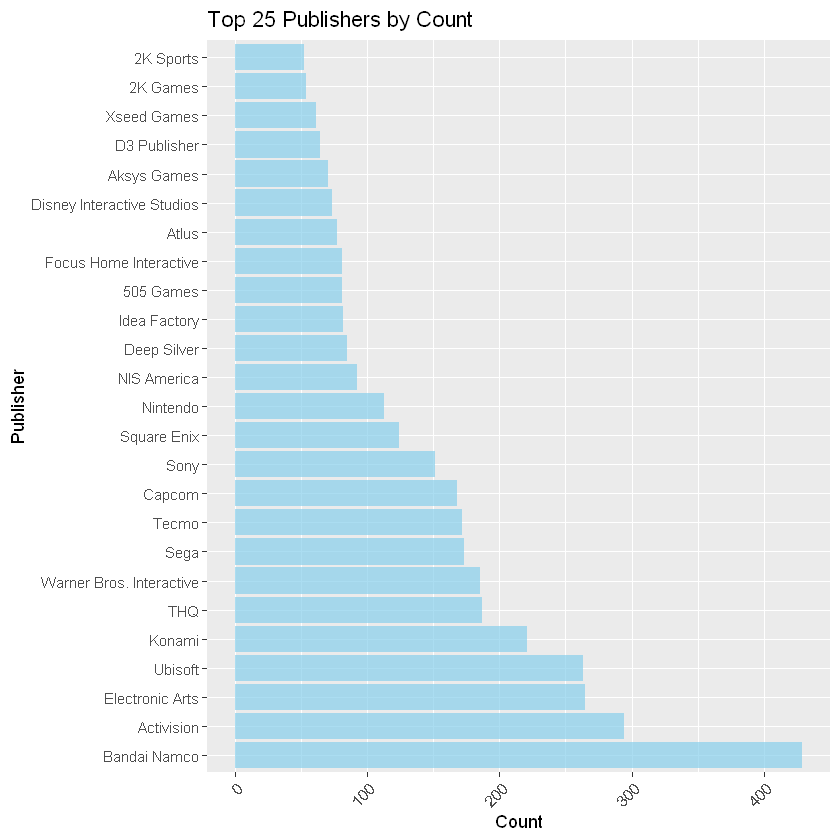

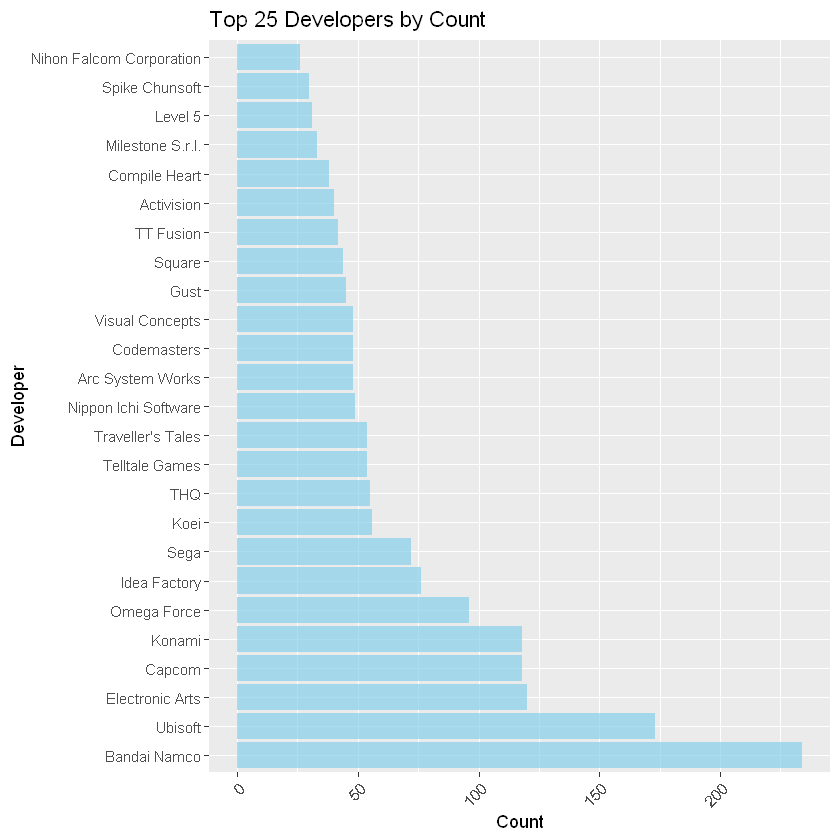

In [58]:
# Visualize top 25 Publishers
ggplot(head(publisher_counts, 25), aes(x = reorder(Publisher, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 25 Publishers by Count",
       x = "Publisher",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

# Visualize top 25 Developers
ggplot(head(developer_counts, 25), aes(x = reorder(Developer, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 25 Developers by Count",
       x = "Developer",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

In [63]:
########################################################
# Re-group Top 10 after addressing data inconsistencies

# Extract the top 10 unique publishers and developers based on count frequency
top10_publishers <- publisher_counts$Publisher %>%
  head(10)

top10_developers <- developer_counts$Developer %>%
  head(10)

# View the top 10
print(top10_publishers)
print(top10_developers)

 [1] Bandai Namco             Activision               Electronic Arts         
 [4] Ubisoft                  Konami                   THQ                     
 [7] Warner Bros. Interactive Sega                     Tecmo                   
[10] Capcom                  
613 Levels: 11 bit studios 17_Bit 1C Company 2K Games 2K Play ... ZOV GAME STUDIO
 [1] Bandai Namco    Ubisoft         Electronic Arts Capcom         
 [5] Konami          Omega Force     Idea Factory    Sega           
 [9] Koei            THQ            
1381 Levels: 11 bit studios 13AM Games 17_Bit 1C Company ... Zushi Games Ltd


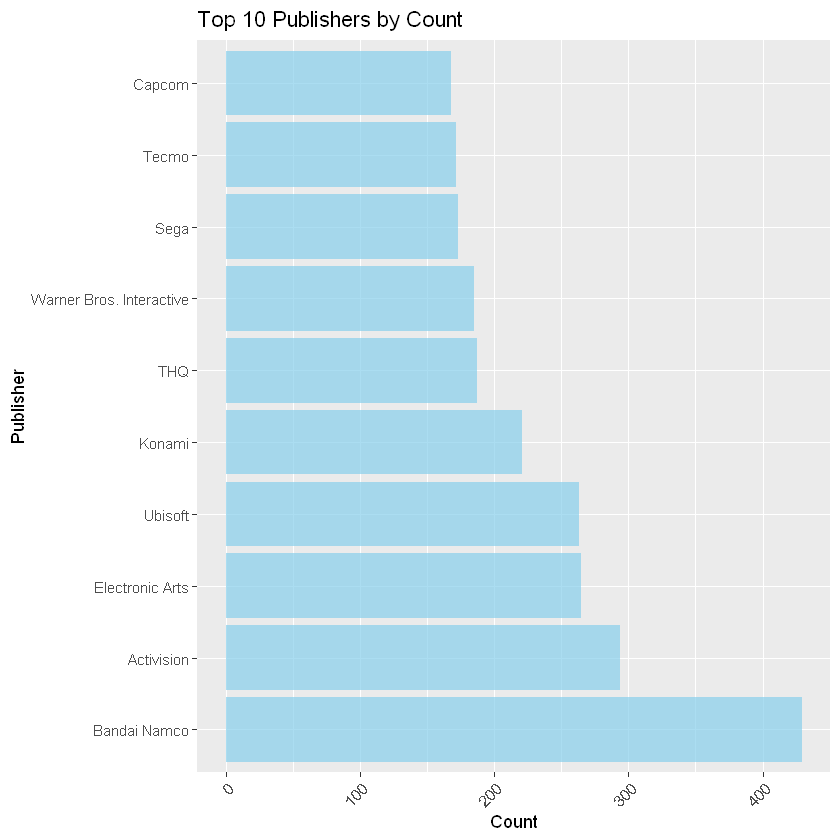

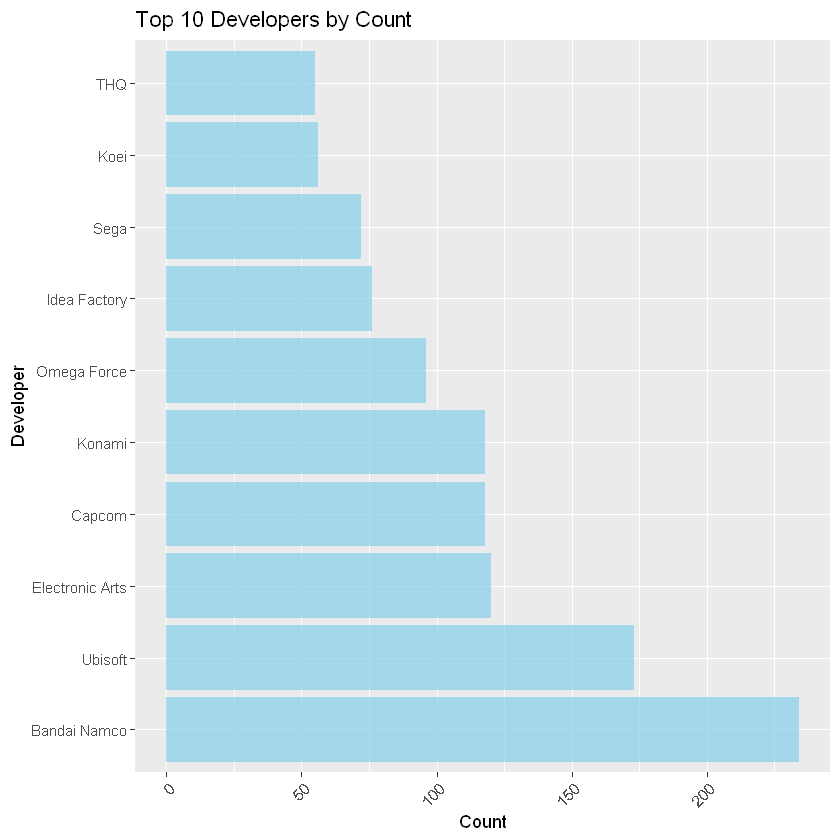

In [65]:
# Visualize top 10 Publishers
ggplot(head(publisher_counts, 10), aes(x = reorder(Publisher, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Publishers by Count",
       x = "Publisher",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

# Visualize top 25 Developers
ggplot(head(developer_counts, 10), aes(x = reorder(Developer, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Developers by Count",
       x = "Developer",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

In [68]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names <- as.character(names)
  names[!names %in% top_names] <- "Others"
  names <- as.factor(names)
  return(names)
}

data$TopPublisher_Count = data$Publisher
data$TopDeveloper_Count = data$Developer

# Replace publishers and developers in the original data frame
data$TopPublisher_Count <- replace_with_others(data$TopPublisher_Count, top10_publishers)
data$TopDeveloper_Count <- replace_with_others(data$TopDeveloper_Count, top10_developers)

In [69]:
########################################################
# Check the number of distinct values for the variables
sapply(data, function(x) n_distinct(x))

Rank                       Title 
                       6072                        4051 
                    Console                   Publisher 
                         17                         613 
                  Developer                       Genre 
                       1381                          13 
                ReleaseYear              ReleaseQuarter 
                          9                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                          94 
          YearsSinceRelease log_transformed_total_sales 
                          9                          94 
         TopPublisher_Count          TopDeveloper_Count 
                         11                          11

In [73]:
## Explore to group Publisher by using TotalSales

# Calculate the sum of TotalSales for each Publisher
publisher_sales <- data %>%
  group_by(Publisher) %>%
  summarise(TotalSales = sum(TotalSales)) %>%
  arrange(desc(TotalSales))

# Calculate the sum of TotalSales for each Developer
developer_sales <- data %>%
  group_by(Developer) %>%
  summarise(TotalSales = sum(TotalSales)) %>%
  arrange(desc(TotalSales))

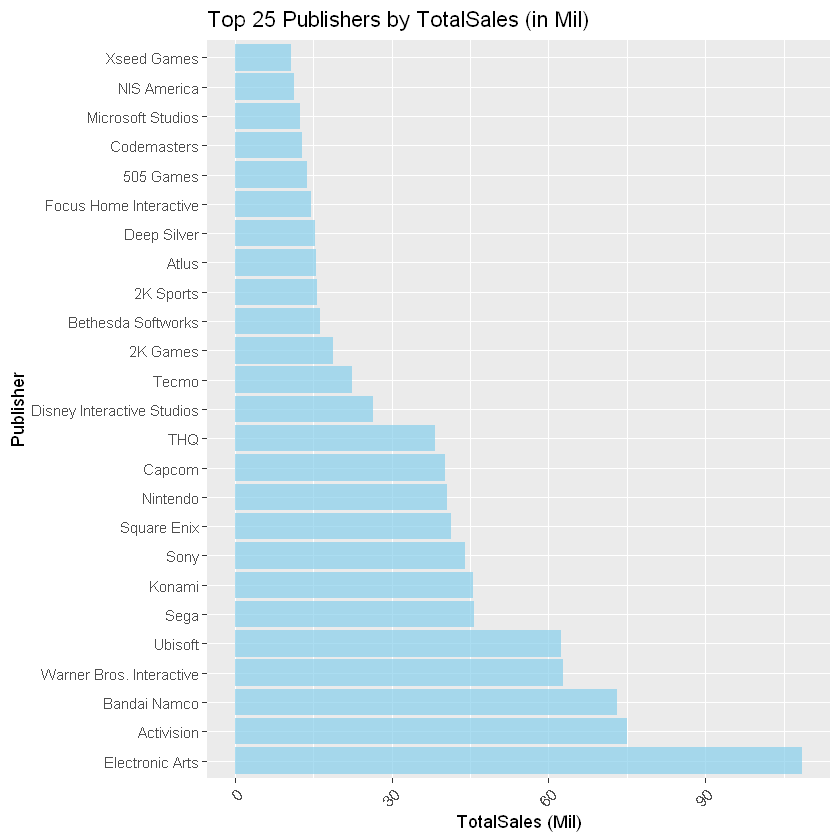

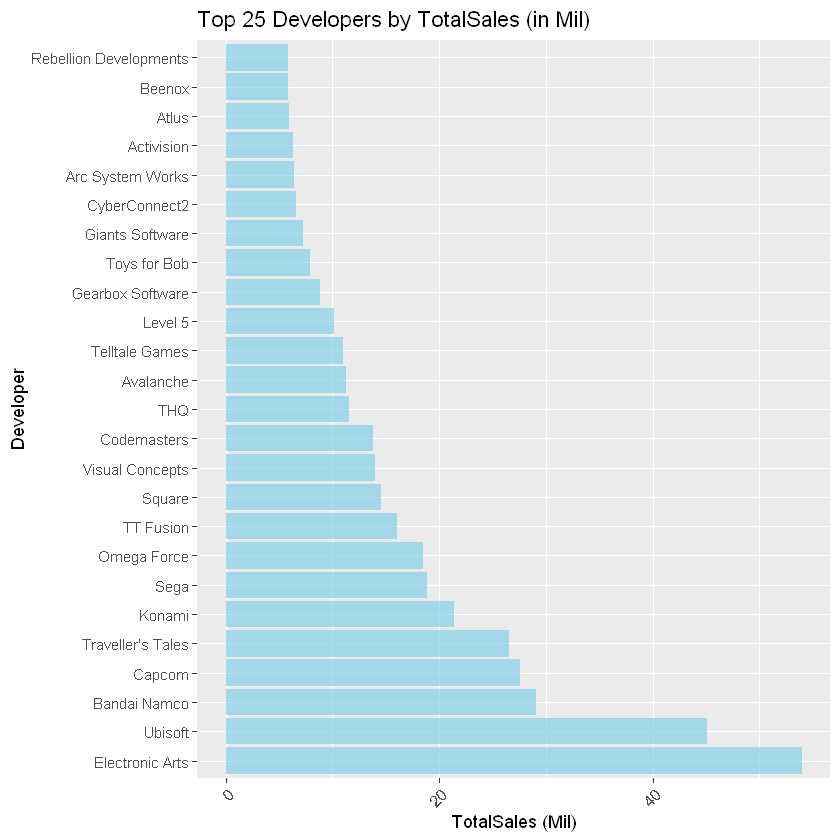

In [75]:
# Visualize top 25 Publishers
ggplot(head(publisher_sales, 25), aes(x = reorder(Publisher, -TotalSales), y = TotalSales/1e6)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 25 Publishers by TotalSales (in Mil)",
       x = "Publisher",
       y = "TotalSales (Mil)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip() +
  scale_y_continuous(labels = scales::comma)


  # Visualize top 25 Developers
ggplot(head(developer_sales, 25), aes(x = reorder(Developer, -TotalSales), y = TotalSales/1e6)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 25 Developers by TotalSales (in Mil)",
       x = "Developer",
       y = "TotalSales (Mil)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip() +
  scale_y_continuous(labels = scales::comma)

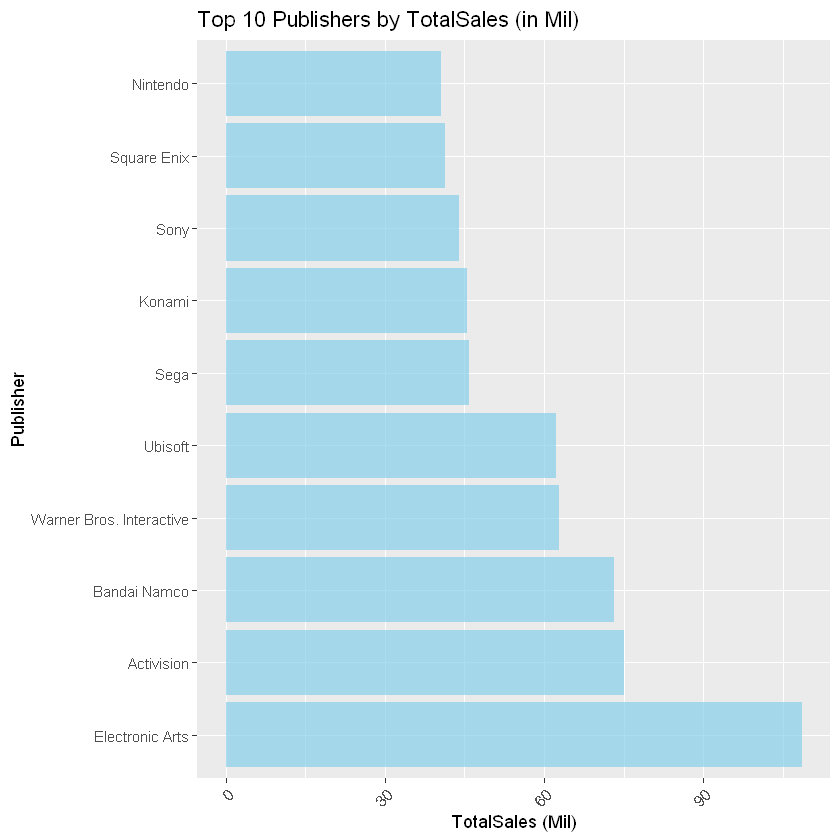

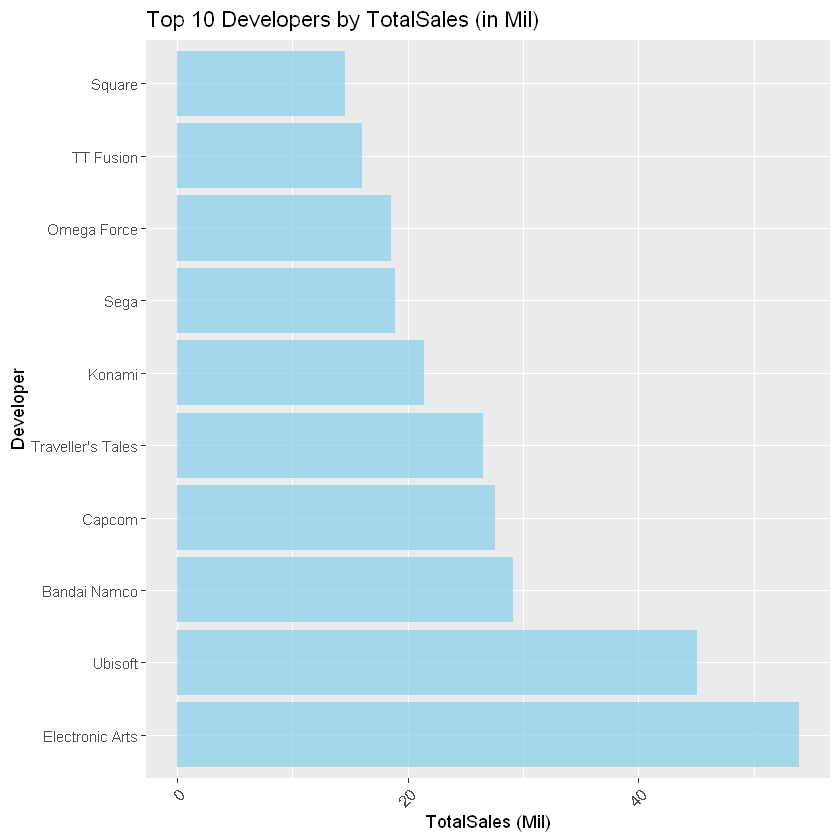

In [77]:
# Visualize top 10 Publishers
ggplot(head(publisher_sales, 10), aes(x = reorder(Publisher, -TotalSales), y = TotalSales/1e6)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Publishers by TotalSales (in Mil)",
       x = "Publisher",
       y = "TotalSales (Mil)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip() +
  scale_y_continuous(labels = scales::comma)


  # Visualize top 10 Developers
ggplot(head(developer_sales, 10), aes(x = reorder(Developer, -TotalSales), y = TotalSales/1e6)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +
  labs(title = "Top 10 Developers by TotalSales (in Mil)",
       x = "Developer",
       y = "TotalSales (Mil)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip() +
  scale_y_continuous(labels = scales::comma)

In [78]:
# Extract the top 10 unique publishers and developers based on count frequency
top10_publishers_sum <- publisher_sales$Publisher %>%
  head(10)

top10_developers_sum <- developer_sales$Developer %>%
  head(10)

# View the top 10
print(top10_publishers_sum)
print(top10_developers_sum)



 [1] Electronic Arts          Activision               Bandai Namco            
 [4] Warner Bros. Interactive Ubisoft                  Sega                    
 [7] Konami                   Sony                     Square Enix             
[10] Nintendo                
613 Levels: 11 bit studios 17_Bit 1C Company 2K Games 2K Play ... ZOV GAME STUDIO
 [1] Electronic Arts   Ubisoft           Bandai Namco      Capcom           
 [5] Traveller's Tales Konami            Sega              Omega Force      
 [9] TT Fusion         Square           
1381 Levels: 11 bit studios 13AM Games 17_Bit 1C Company ... Zushi Games Ltd


In [82]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names <- as.character(names)
  names[!names %in% top_names] <- "Others"
  names <- as.factor(names)
  return(names)
}

data$TopPublisher_Sum = data$Publisher
data$TopDeveloper_Sum = data$Developer

# Replace publishers and developers in the original data frame
data$TopPublisher_Sum <- replace_with_others(data$TopPublisher_Sum, top10_publishers_sum)
data$TopDeveloper_Sum <- replace_with_others(data$TopDeveloper_Sum, top10_developers_sum)

In [83]:
########################################################
# Check the number of distinct values for the variables
sapply(data, function(x) n_distinct(x))

Rank                       Title 
                       6072                        4051 
                    Console                   Publisher 
                         17                         613 
                  Developer                       Genre 
                       1381                          13 
                ReleaseYear              ReleaseQuarter 
                          9                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                          94 
          YearsSinceRelease log_transformed_total_sales 
                          9                          94 
         TopPublisher_Count          TopDeveloper_Count 
                         11                          11 
           TopPublisher_Sum            TopDeveloper_Sum 
                         11                          11

In [129]:
str(data)

'data.frame':	6072 obs. of  20 variables:
 $ Rank                       : int  2703 2706 2707 2713 2716 2717 2722 2726 2731 2732 ...
 $ Title                      : chr  "Dust: An Elysian Tail" "Zombie Army Trilogy" "Borderlands 2" "EA Sports Active 2" ...
 $ Console                    : Factor w/ 21 levels "3DS","Amig","DS",..: 7 7 7 9 10 19 21 9 7 7 ...
 $ Publisher                  : Factor w/ 613 levels "11 bit studios",..: 354 454 4 168 592 592 6 16 106 142 ...
 $ Developer                  : Factor w/ 1381 levels "11 bit studios",..: 577 988 493 390 1254 1254 1307 1252 243 288 ...
 $ Genre                      : Factor w/ 13 levels "Action","Action-Adventure",..: 6 10 10 12 1 1 12 1 10 7 ...
 $ ReleaseYear                : int  2013 2015 2012 2010 2014 2014 2013 2011 2010 2014 ...
 $ ReleaseQuarter             : int  2 2 3 4 4 4 4 4 2 4 ...
 $ ReleaseMonth               : int  5 6 9 11 11 11 11 10 6 11 ...
 $ ReleaseWeek                : int  21 23 38 47 46 46 47 43 27 46 ...
 $ 

Multi-collinearity assessment

In [ ]:
# Extract the numerical predictor variables from your data
numerical_predictors <- data[, c("ReleaseYear", "ReleaseQuarter", "ReleaseMonth", "ReleaseWeek", "ReleaseDay", "YearsSinceRelease")]

# Identify collinear variables
cor_matrix <- cor(numerical_predictors)
cor_matrix 

,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,YearsSinceRelease
ReleaseYear,1.0000000000,-0.001559821,-0.007332259,-0.01747475,0.0004192302,-1.0000000000
ReleaseQuarter,-0.0015598206,1.000000000,0.971484852,0.96800913,-0.0105455251,0.0015598206
ReleaseMonth,-0.0073322590,0.971484852,1.000000000,0.99641304,-0.0032445816,0.0073322590
ReleaseWeek,-0.0174747471,0.968009128,0.996413036,1.00000000,-0.0168131239,0.0174747471
ReleaseDay,0.0004192302,-0.010545525,-0.003244582,-0.01681312,1.0000000000,-0.0004192302
YearsSinceRelease,-1.0000000000,0.001559821,0.007332259,0.01747475,-0.0004192302,1.0000000000


In [111]:
# Select the categorical variables to compare
categorical_variables <- data[, c("Console", "Genre", "ReleaseWeekend", "EndOfMonth", "TopPublisher_Count", "TopDeveloper_Count", "TopPublisher_Sum", "TopDeveloper_Sum")]

# Create an empty matrix to store p-values from chi-square tests
p_values_matrix <- matrix(NA, nrow = ncol(categorical_variables), ncol = ncol(categorical_variables))
rownames(p_values_matrix) <- colnames(p_values_matrix) <- names(categorical_variables)

# Perform chi-square tests for all pairs of categorical variables
for (i in 1:(ncol(categorical_variables) - 1)) {
  for (j in (i + 1):ncol(categorical_variables)) {
    cross_tab <- table(categorical_variables[, i], categorical_variables[, j])
    chi_square_test <- chisq.test(cross_tab)
    p_values_matrix[i, j] <- p_values_matrix[j, i] <- chi_square_test$p.value
  }
}

# Print or view the p-values matrix
print(p_values_matrix)

Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"

                   Console         Genre ReleaseWeekend   EndOfMonth
Console                 NA           NaN            NaN          NaN
Genre                  NaN            NA   7.414458e-02 6.037509e-03
ReleaseWeekend         NaN  7.414458e-02             NA 5.707397e-16
EndOfMonth             NaN  6.037509e-03   5.707397e-16           NA
TopPublisher_Count     NaN  0.000000e+00   5.429944e-07 1.825562e-04
TopDeveloper_Count     NaN  0.000000e+00   7.738754e-03 1.624400e-02
TopPublisher_Sum       NaN 3.730944e-317   5.692872e-16 1.003650e-05
TopDeveloper_Sum       NaN  0.000000e+00   9.974433e-02 7.146119e-02
                   TopPublisher_Count TopDeveloper_Count TopPublisher_Sum
Console                           NaN                NaN              NaN
Genre                    0.000000e+00        0.000000000    3.730944e-317
ReleaseWeekend           5.429944e-07        0.007738754     5.692872e-16
EndOfMonth               1.825562e-04        0.016243998     1.003650e-05
TopPublis

Split Training and Testing Dataset

In [161]:
########################################################
# Split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data$log_transformed_total_sales, SplitRatio = 0.8)
training_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

Build LM model

In [ ]:
########################################################
# Build LM model for TopN based on frequency count

lm_model1 = lm(log_transformed_total_sales ~ . -Rank - Title - Publisher - Developer  - TopPublisher_Count - TopPublisher_Sum - TopDeveloper_Sum - TotalSales - log_transformed_total_sales , , data = training_data)
summary(lm_model1)

In [152]:
########################################################
# Build LM model for TopN based on frequency count

lm_model2 = lm(log_transformed_total_sales ~ . -Rank 
            - Title - Publisher - Developer  
            - Genre
            - TopDeveloper_Count 
            - TopPublisher_Sum - TopDeveloper_Sum
            - ReleaseQuarter - ReleaseMonth - ReleaseWeek - EndOfMonth - YearsSinceRelease
            - TotalSales - log_transformed_total_sales , data = training_data)

In [153]:
########################################################
# Build LM model for TopN based on frequency count

lm_model3 = lm(log_transformed_total_sales ~ . -Rank 
            - Title - Publisher - Developer  
            - Genre 
            - TopPublisher_Count 
            - TopPublisher_Sum - TopDeveloper_Sum 
            - ReleaseQuarter - ReleaseMonth - ReleaseWeek - EndOfMonth - YearsSinceRelease 
            - TotalSales - log_transformed_total_sales , data = training_data)

In [162]:
########################################################
# Build LM model for TopN based on sum of Total Sales

lm_model4 = lm(log_transformed_total_sales ~ . -Rank 
            - Title - Publisher - Developer  
            - Genre 
            - TopDeveloper_Sum 
            - TopPublisher_Count - TopDeveloper_Count 
            - ReleaseQuarter - ReleaseMonth - ReleaseWeek - EndOfMonth - YearsSinceRelease 
            - TotalSales - log_transformed_total_sales , data = training_data)

In [155]:
########################################################
# Build LM model for TopN based on sum of Total Sales

lm_model5 = lm(log_transformed_total_sales ~ . -Rank 
            - Title - Publisher - Developer  
            - Genre 
            - TopPublisher_Sum 
            - TopPublisher_Count - TopDeveloper_Count 
            - ReleaseQuarter - ReleaseMonth - ReleaseWeek - EndOfMonth - YearsSinceRelease 
            - TotalSales - log_transformed_total_sales , data = training_data)

In [156]:
########################################################
# Build LM model for TopN based on sum of Total Sales

lm_model6 = lm(log_transformed_total_sales ~ . -Rank 
            - Title - Publisher - Developer 
            - TopPublisher_Sum - TopDeveloper_Sum 
            - TopPublisher_Count - TopDeveloper_Count 
            - ReleaseQuarter - ReleaseMonth - ReleaseWeek - EndOfMonth - YearsSinceRelease 
            - TotalSales - log_transformed_total_sales , data = training_data)

In [157]:
########################################################
# View using StarGazer

# Create a list of your linear regression models
lm_models <- list(AllDateDimensions = lm_model1, 
                Top10Publishers_Count = lm_model2, 
                Top10Developers_Count = lm_model3, 
                Top10Publishers_TotalSales  = lm_model4, 
                Top10Developers_TotalSales = lm_model5, 
                Genre = lm_model6)

# Generate a regression table using stargazer
stargazer(lm_models, 
          title = "Regression Models Comparison",
          dep.var.caption = "Dependent Variable",
          dep.var.labels = "Response Variable",
          align = TRUE,
          type = "text",
          out = "summary_table.txt")


Regression Models Comparison
                                                                                                               Dependent Variable                                                                     
                                           -----------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                Response Variable                                                                     
                                                      (1)                       (2)                       (3)                       (4)                       (5)                       (6)           
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LM Actual vs Prediction Plot

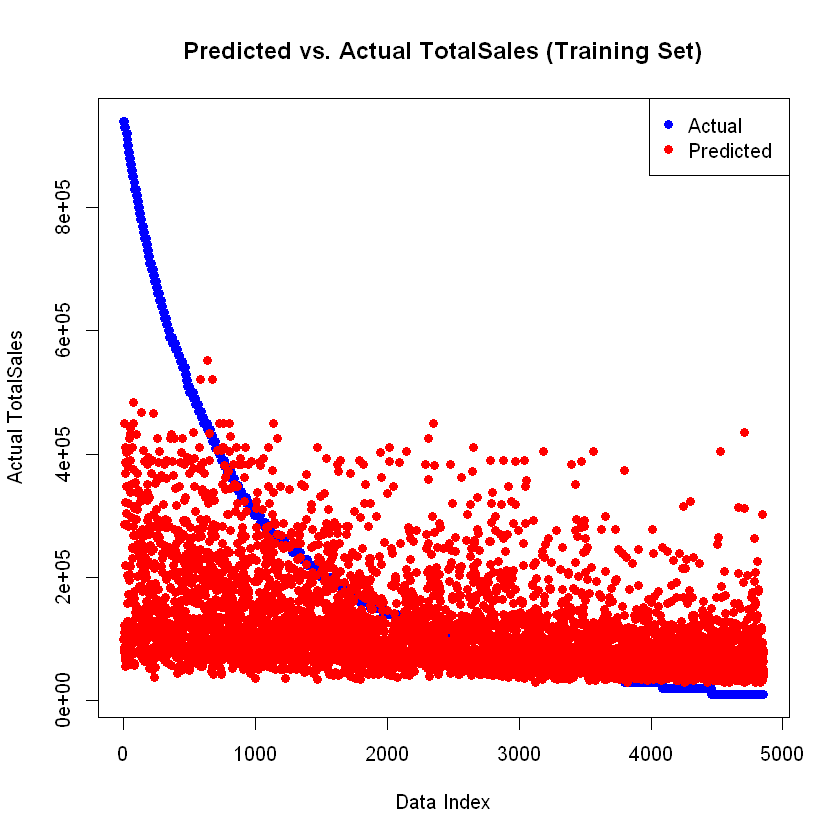

In [171]:
# Model 4 has highest R2 and adjusted R2 score among all the models
# Make predictions using the lm model
predicted_values_train <- predict(lm_model4, training_data)

# Convert log-transformed values back to the original scale
actual_values_train <- training_data$TotalSales
predicted_values_train_exp <- exp(predicted_values_train)

# Create a scatterplot to compare predicted vs actual TotalSales on the training set
plot(seq_along(actual_values_train), actual_values_train,
     main = "Predicted vs. Actual TotalSales (Training Set)",
     xlab = "Data Index", ylab = "Actual TotalSales",
     col = "blue", pch = 16)

# Add the predicted values on the training set
points(seq_along(predicted_values_train_exp), predicted_values_train_exp, col = "red", pch = 16)

# Add the fitted line from the lm model
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), pch = 16)


In [173]:
# Model 4 has highest R2 and adjusted R2 score among all the models
# Make predictions using the lm model
predicted_values_test <- predict(lm_model4, test_data)

# Convert log-transformed values back to the original scale
actual_values_test <- test_data$TotalSales
predicted_values_test_exp <- exp(predicted_values_test)

# Create a scatterplot to compare predicted vs actual TotalSales on the training set
plot(seq_along(actual_values_test), actual_values_test,
     main = "Predicted vs. Actual TotalSales (Testing Set)",
     xlab = "Data Index", ylab = "Actual TotalSales",
     col = "blue", pch = 16)

# Add the predicted values on the training set
points(seq_along(predicted_values_test_exp), predicted_values_test_exp, col = "red", pch = 16)

# Add the fitted line from the lm model
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), pch = 16)


ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Title has new levels 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby), 10 Minute Solution, 100 Classic Games, 12-Sai. Torokeru Puzzle Futari no Harmony, 12 Labours of Hercules III: Girl Power, 18 Wheels of Steel: Extreme Trucker 2, 20XX, 4 Play Collection - Dark Mysteries, 4 Play Collection: Treasure Hunters, 7 Wonders: Treasures of Seven, 8-Bit Armies, A Game of Thrones: Genesis, ABBA: You Can Dance, Ace Attorney Investigations 2, Act of Aggression, After Hours Athletes, Again, Agatha Christie: The ABC Murders, Agents of Mayhem, Akin, Alien Breed 2: Assault, Alien Breed: Impact, All Kamen Rider: Rider Generation 2, All Kamen Rider: Rider Revolution, Alter World, Angry Birds: Rio, Anima - Gate of Memories, Anno 2205, Apollo Justice: Ace Attorney, Aqua Moto Racing Utopia, Arcana Heart 3, ArmaGallant: Decks of Destiny, Art Academy: Home Studio, Ashes Cricket, Asphalt 3D, Assassin's Creed Odyssey, Assassin's Creed Syndicate, Assault Suit Leynos, Astro Bot Rescue Mission, Attack on Titan: Escape from Certain Death, Attempt[42], ATV Quad Kings, Bad Apple Wars, Bass Pro Shops: The Strike - Championship Edition, Batman: Arkham Origins, Battle Garegga Rev.2016, Battle Princess of Arcadias, Battle Ranch: Pigs vs Plants, Battlefield: Bad Company 2, Battleplan: American Civil War, Battlezone, Beat City, Bella Sara 2 - The Magic of Drasilmare, Ben 10 Triple Pack, Beyblade Burst: God, Beyblade: Metal Fusion, Beyblade: Metal Masters, Binary Star, bit Dungeon II, Bleach: Heat the Soul 7, Bleed, Bloop Reloaded, Bomber Crew, Borderlands: The Handsome Collection, BoxBoy! Hakobume Box, Bravely Second: End Layer, Bravo Team, Brawlout, Bridge Project, Bunmei Haruka: Aoiza Ibunroku, Busou Shinki: Battle Masters, Busou Shinki: Battle Masters Mk. 2, Buzz! The Ultimate Music Quiz, Cake-ya San Monogatari: Ooishii Sweets o Tsukurou!, Calling, Cardfight!! Vanguard: Lock On Victory!!, Carnage Heart EXA, Casino Chaos With Las Vegas Players Collection, Chaos Rings III, Cities: Skylines Snowfall, City Climber, Clash of the Titans: The Videogame, Clustertruck, Code Name: S.T.E.A.M., Codename: Panzers Complete Collection, Combat of Giants: Dinosaurs 3D, Cook, Serve, Delicious!, Corpse Party: Book of Shadows, Cosmos Chaos!, Crayon Shin-chan: Arashi o Yobu Kasukabe Eiga Stars!, Crime Lab: Body of Evidence, Criminal Girls, Criminal Girls 2: Party Favors, Cross † Channel, Cross Channel: In Memory of All People, Crush3D, Culdcept Revolt, DaGeDar, Daito Giken Koushiki Pachi-Slot Simulator: Ossu! Misao + Maguro Densetsu Portable, Damage Inc.: Pacific Squadron WWII, Danball Senki Boost, Dance Dance Revolution: Hottest Party 5, Dance on Broadway, Danganronpa 1-2 Reload, Dark Fall 3: Lost Souls, Dark Rose Valkyrie, DarkEnd, Darkness Assault, Dead or Alive Xtreme 3: Fortune, Deadly 30, Deca Sports 3, DEFIANCE, Deponia Doomsday, Depth Hunter 2: Deep Dive, Desert Kingdom, Detective Conan: Marionette Symphony, Detective Pikachu, Devil Daggers, Devil May Cry 4 Special Edition, Dexodonex, Diabolik Lovers: More Blood, Disciples III: Renaissance, Disciples III: Resurrection, Discover Europe, Disgaea 4: A Promise Unforgotten, Disgaea PC, Disney Channel: All Star Party, Disney Epic Mickey: The Power of Illusion, Disney Fairies: Tinker Bell and the Great Fairy Rescue, Disneyland Adventures, Dissidia Final Fantasy NT, Doraemon: Nobita and the Island of Miracles, Doraemon: Shin Nobita no Daimakyou Peko to 5-nin no Tankenta, Downtown Nekketsu Koushinkyoku: Soreyuke Daiundoukai All-Star Special, Dragon Ball Heroes: Ultimate Mission 2, Dragon Ball: Origins 2, Dragon Ball: Xenoverse 2, Dragon Quest Monsters Joker 3, Dragon Quest Monsters: Terry's Wonderland 3D, Dragon Quest X: 5000-nen no Harukanaru Kokyou e Online, Drawful 2, Dreamcast Collection, Dungeon Souls, Dungeon Travelers 2-2: The Maiden Who Fell into Darkness and the Book of Beginnings, Dungeons & Dragons Anthology: The Master Collection, Dungeons & Dragons: Daggerdale, Dungeons 2, Dynasty Warriors 9, Earth Defense Force 5, Ebikore Photo Kano Kiss, Elminage Gothic: Ulm Zakir to Yami no Gishiki, Emily the Strange: Strangerous, Escape the Emerald Star, Etrian Odyssey: Millennium Girl, Everybody's Golf, Extinction, Fabled Legends: The Dark Piper, Fairyland: Fairy Power, Family Party: 30 Great Games Winter Fun, Fantastic Football Fan Party, Fantastic Pets, Far Cry 3, Farming Simulator 15 Expansion Pack, Fate/kaleid liner Prisma Illya, Fernbus Simulator, FIFA 16, FIFA Soccer, Final Fantasy VI, Final Fantasy XV: Windows Edition, Fire Emblem: Shin Monshou no Nazo Hikari to Kage no Eiyuu, Fire Pro Wrestling World, Fishdom, Football Manager Handheld 2012, Fragile Dreams: Farewell Ruins of the Moon, Freddi Fish: ABC under the sea, Fushigi no Dungeon: Fuurai no Shiren 5 - Fortune Tower to Unmei no Dice, Future Card Buddyfight: Tanjou! Oretachi no Saikyou Body!, Future Card Buddyfight: Yuujou no Bakunetsu Fight!, G1 Grand Prix, GachiTora! Abarenbou Kyoushi in High School, Gaist Crusher, Gakuen K: Wonderful School Days, Galactic Civilizations III, Game Center CX: 3-Choume no Arino, Games Around the World, Giana Sisters: Twisted Dreams, Girls RPG: Cinderellife, Girls und Panzer: Dream Tank Match, God Eater Off Shot: Soma Shikkuzaru-hen Twin Pack & Animation Vol.4, God of War Saga, Godzilla (2014), Godzilla (2015), GoldenEye 007, Grand Pigeon's Duty, Grand Slam Tennis 2, Great Battle Full Blast, Greed Corp, GRIP: Combat Racing, Gundam Versus, Gunslingers, Hakoniwa Company Works, Hakuouki: Yuugi Roku, Halo: Spartan Assault, HappinessCharge PreCure! Kawarun Collection, Harvest Moon: The Lost Valley, Hatred, Hatsune Miku: Project Diva Extend, Hatsune Miku: Project Mirai DX, Heart no Kuni no Alice Anniversary Ver.: Wonderful Wonder World, Heaven Forest NIGHTS, Her Story, Hero Bank 2, Hexyz Force, Hidden Agenda, Hidden Mysteries: Buckingham Palace, Hidden Mysteries: Salem Secrets - Witch Trials of 1692, Higurashi no Naku Koro ni Kizuna: Dai-Yon-Kan - Kizuna, Himoutou! Umaru-Chan: Himoutou Ikusei Keikaku, Hitman, Hole in the Wall: Deluxe Edition, Hollywood Squares, Hometown Story, Homeworld Remastered Collection, Horrible Histories: Ruthless Romans, Hulk Hogan's Main Event, Hunter x Hunter: Wonder Adventure, Hyakumanton no Bara Bara, Hyperdimension Idol Neptunia PP, I Love Horses: Rider's Paradise, I Spy: Universe, Ikaruga, Ikki Tousen: Xross Impact, Imagine Animal Doctor Care Center, Imagine: Fashion Designer, Inazuma Eleven 3: Sekai e no Chousen!! The Ogre, Injustice: Gods Among Us, Invizimals: The Lost Tribes, Iron Sky: Invasion, Ishin Renka: Ryouma Gaiden, Iwaihime: Matsuri, Iza, Shutsujin! Koisen, J-League Pro Soccer Club o Tsukurou! 7 Euro Plus, Jam With the Band, Jikkyou Powerful Pro Baseball Heroes, Joker no Kuni no Alice, Journey, Just Dance 2017, Just Sing! Vol. 2, Kaitou Tenshi Twin Angel: Toki to Sekai no Meikyuu, Kamen Rider Travelers Record, Kamiko, Karaoke Revolution Glee: Volume 3, Katekyoo Hitman Reborn! DS Fate of Heat III - Yuki no Shugosha Raishuu!, Ken to Mahou to Gakuen Mono. 3D, Ketsui Deathtiny: Kizuna Jigoku Tachi, Kid Adventures: Sky Captain, Kidou Senshi Gundam: Shin Gihren no Yabou, Kimi ni Todoke: Tsutaeru Kimochi, King Arthur's Gold, King Arthur II: The Role-playing Wargame, Kingdom Hearts: Birth by Sleep - Final Mix, Know How 2, KORG DS-10 Synthesizer Plus, Kouekizaidan Houjin Nihon Kanji Nouryoku Kentei Kyoukai: Kanken Training 2, Kurenai no Homura: Sanada Ninpou Chou, Kuroko's Basketball: Ties to Future, Legasista, Legend of Grimrock, Legends of Oz: Dorothy's Return, Lego City Undercover: The Chase Begins, LEGO Ninjago: Shadow of Ronin, Let's Cheer, Let's Play Flight Attendant, Lips: Party Classics, Little Battlers eXperience: Wars, LittleBigPlanet Karting, Living Legends: Frozen Beauty, Lord of Magna: Maiden Heaven, Love of Renai Koutei of Love!, Lovely Lisa and Friends, Loving Life with Hello Kitty & Friends, Madden NFL 25, Magicka: Vietnam, Mahouka Koukou no Rettousei: Out of Order, Majesty 2 Collection, Marginal #4: Idol of Supernova, Mass Effect 2, Mathews Bowhunting, Mechanic Escape, Medabots Dual: Kabuto / Kuwagata, Medal of Honor, Medalot 7, Medarot 9: Kabuto Ver. / Kuwagata Ver., Megamind: Mega 


In [174]:
# Calculate various error metrics on the original scale for the training set
errors_train <- training_data$TotalSales - predicted_values_train_exp
sum_of_errors_train <- sum(errors_train)
mean_absolute_deviation_train <- mean(abs(errors_train))
mean_percentage_error_train <- mean(errors_train) * 100  # Already on the original scale
mean_squared_error_train <- mean(errors_train^2)
standard_error_train <- sqrt(mean_squared_error_train)
mean_absolute_percentage_error_train <- mean(abs(errors_train)) * 100

# Print the error metrics for the training set
cat("Sum of Errors (Training):", sum_of_errors_train, "\n")
cat("Mean Absolute Deviation (Training):", mean_absolute_deviation_train, "\n")
cat("Mean Percentage Error (Training):", mean_percentage_error_train, "%\n")
cat("Mean Squared Error (Training):", mean_squared_error_train, "\n")
cat("Standard Error (Training):", standard_error_train, "\n")
cat("Mean Absolute Percentage Error (Training):", mean_absolute_percentage_error_train, "%\n")

Sum of Errors (Training): 342595020 
Mean Absolute Deviation (Training): 126815.1 
Mean Percentage Error (Training): 7053634 %
Mean Squared Error (Training): 40737123499 
Standard Error (Training): 201834.4 
Mean Absolute Percentage Error (Training): 12681505 %


Neural Network_count

In [214]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 10, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 20, activation = "relu") %>%
  layer_dense(units = 5, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model with custom absolute error loss and MAE metric
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [203]:
summary (model)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_12 (Dense)                   (None, 10)                      120         
 dense_14 (Dense)                   (None, 20)                      220         
 dense_13 (Dense)                   (None, 5)                       105         
 dense_15 (Dense)                   (None, 1)                       6           
Total params: 451
Trainable params: 451
Non-trainable params: 0
________________________________________________________________________________


In [188]:
# Exclude specific columns
excluded_columns <- c("Rank", 
                    "Title", 
                    "Publisher", 
                    "Developer", 
                    "YearsSinceRelease", 
                    "log_transformed_total_sales", 
                    "TopPublisher_Sum", 
                    "TopDeveloper_Sum", 
                    "TotalSales")
                    
x_train <- training_data[, !names(training_data) %in% excluded_columns]
x_test <- test_data[, !names(test_data) %in% excluded_columns]

In [215]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$TotalSales), epochs = 100, batch_size = 100, verbose = 1)

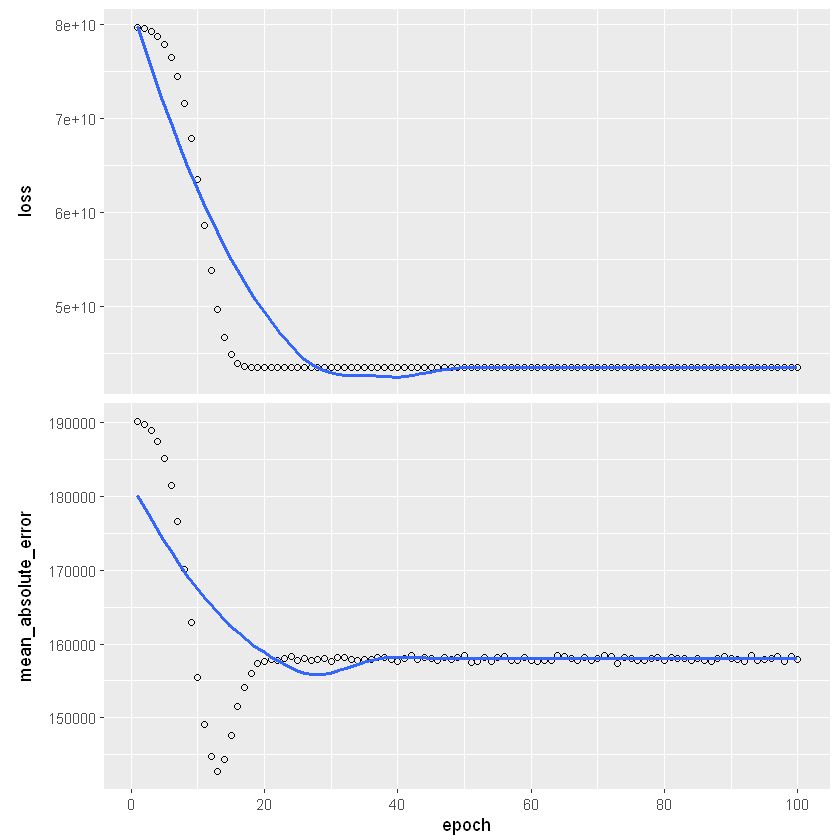

In [216]:
plot(history)

In [217]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$TotalSales)  # Target variable for testing
)

In [218]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
       4.335517e+10        1.576589e+05 


In [219]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_TotalSales = training_data$TotalSales, Predicted_TotalSales = predictions)

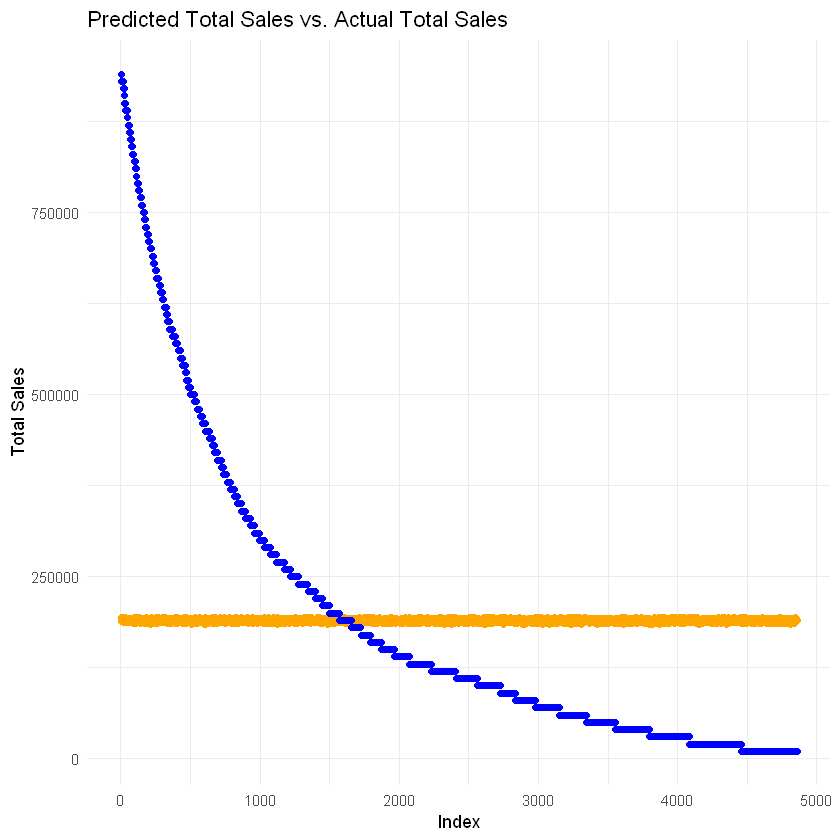

In [220]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_TotalSales))) +
  geom_point(aes(y = Predicted_TotalSales), color = "orange") +
  geom_point(aes(y = Actual_TotalSales), color = "blue") +
  labs(x = "Index", y = "Total Sales") +
  ggtitle("Predicted Total Sales vs. Actual Total Sales") +
  theme_minimal()

In [120]:
# Export to excel

write_xlsx(results, path = "NN_results.xlsx")

Neural Network_sum

In [221]:
# Exclude specific columns
excluded_columns <- c("Rank", 
                    "Title", 
                    "Publisher", 
                    "Developer", 
                    "YearsSinceRelease", 
                    "log_transformed_total_sales", 
                    "TopPublisher_Count", 
                    "TopDeveloper_Count", 
                    "TotalSales")
                    
x_train <- training_data[, !names(training_data) %in% excluded_columns]
x_test <- test_data[, !names(test_data) %in% excluded_columns]

In [228]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$TotalSales), epochs = 100, batch_size = 100, verbose = 1)

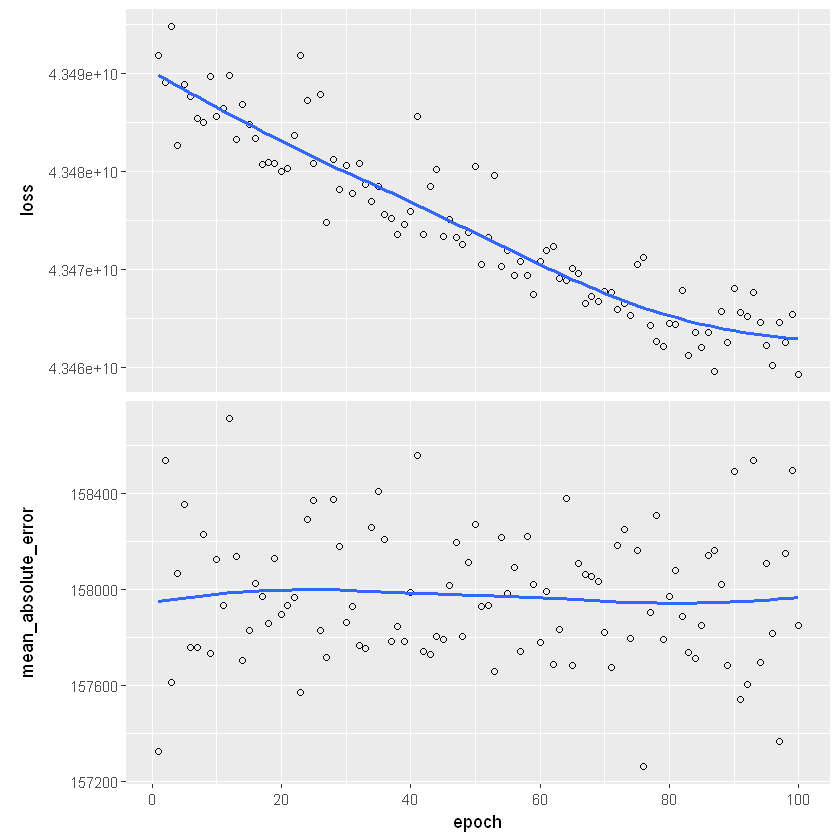

In [223]:
plot(history)

In [224]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$TotalSales)  # Target variable for testing
)

In [225]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
       4.332587e+10        1.579718e+05 


In [226]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_TotalSales = training_data$TotalSales, Predicted_TotalSales = predictions)

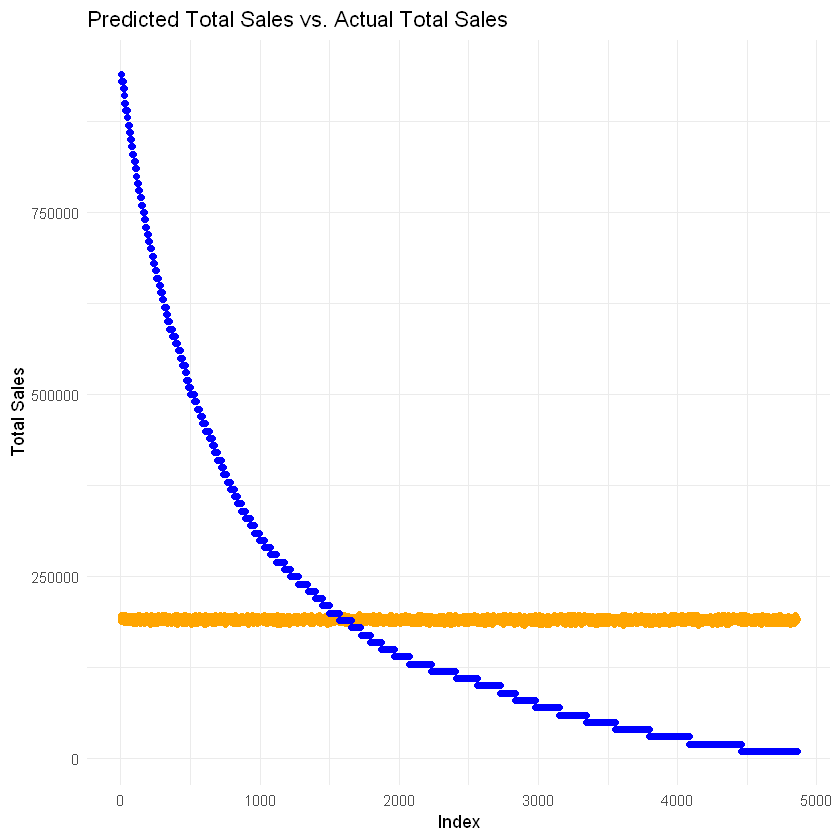

In [227]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_TotalSales))) +
  geom_point(aes(y = Predicted_TotalSales), color = "orange") +
  geom_point(aes(y = Actual_TotalSales), color = "blue") +
  labs(x = "Index", y = "Total Sales") +
  ggtitle("Predicted Total Sales vs. Actual Total Sales") +
  theme_minimal()

Model: "sequential_7"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_28 (Dense)                   (None, 10)                      120         
 dense_30 (Dense)                   (None, 20)                      220         
 dense_29 (Dense)                   (None, 5)                       105         
 dense_31 (Dense)                   (None, 1)                       6           
Total params: 451
Trainable params: 451
Non-trainable params: 0
________________________________________________________________________________
               loss mean_absolute_error 
       7.966049e+10        1.904102e+05 


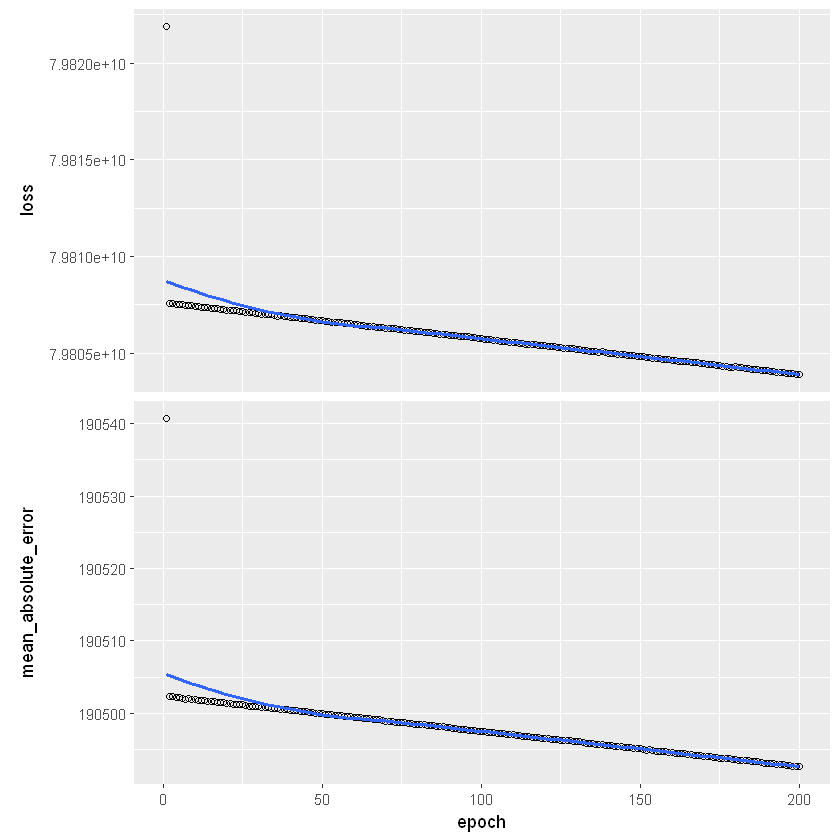

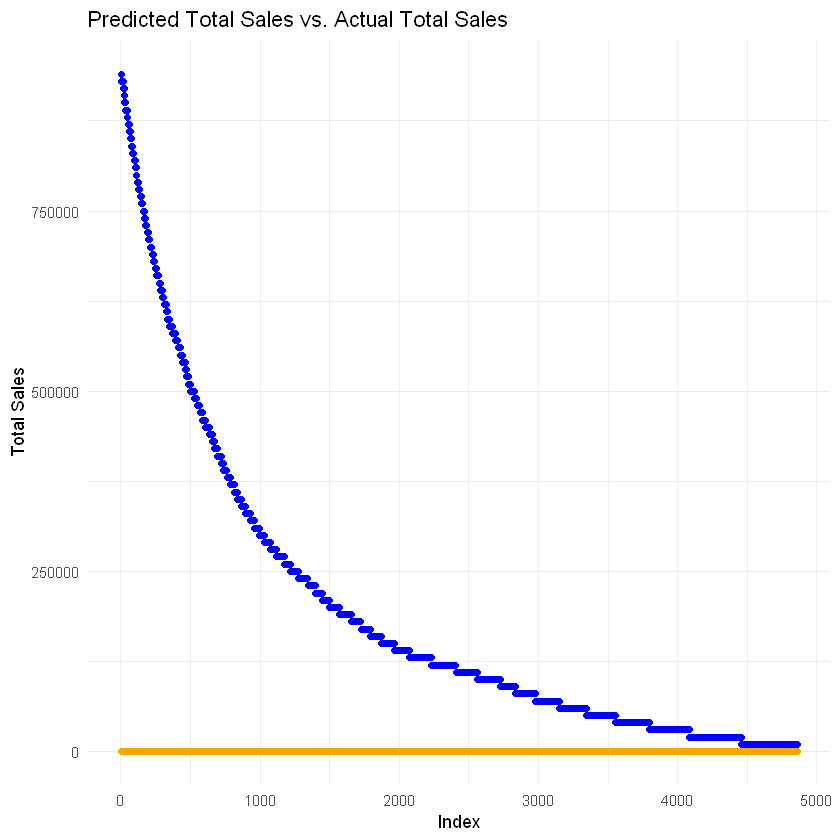

In [229]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 10, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 20, activation = "relu") %>%
  layer_dense(units = 5, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model with custom absolute error loss and MAE metric
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

  summary (model)

  # Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$TotalSales), epochs = 200, batch_size = 100, verbose = 1)

plot(history)

# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$TotalSales)  # Target variable for testing
)


# Print the evaluation metrics
print(eval_metrics)


# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_TotalSales = training_data$TotalSales, Predicted_TotalSales = predictions)

# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_TotalSales))) +
  geom_point(aes(y = Predicted_TotalSales), color = "orange") +
  geom_point(aes(y = Actual_TotalSales), color = "blue") +
  labs(x = "Index", y = "Total Sales") +
  ggtitle("Predicted Total Sales vs. Actual Total Sales") +
  theme_minimal()



Model: "sequential_8"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_32 (Dense)                   (None, 10)                      120         
 dense_33 (Dense)                   (None, 20)                      220         
 dense_34 (Dense)                   (None, 1)                       21          
Total params: 361
Trainable params: 361
Non-trainable params: 0
________________________________________________________________________________
               loss mean_absolute_error 
       4.335328e+10        1.576953e+05 


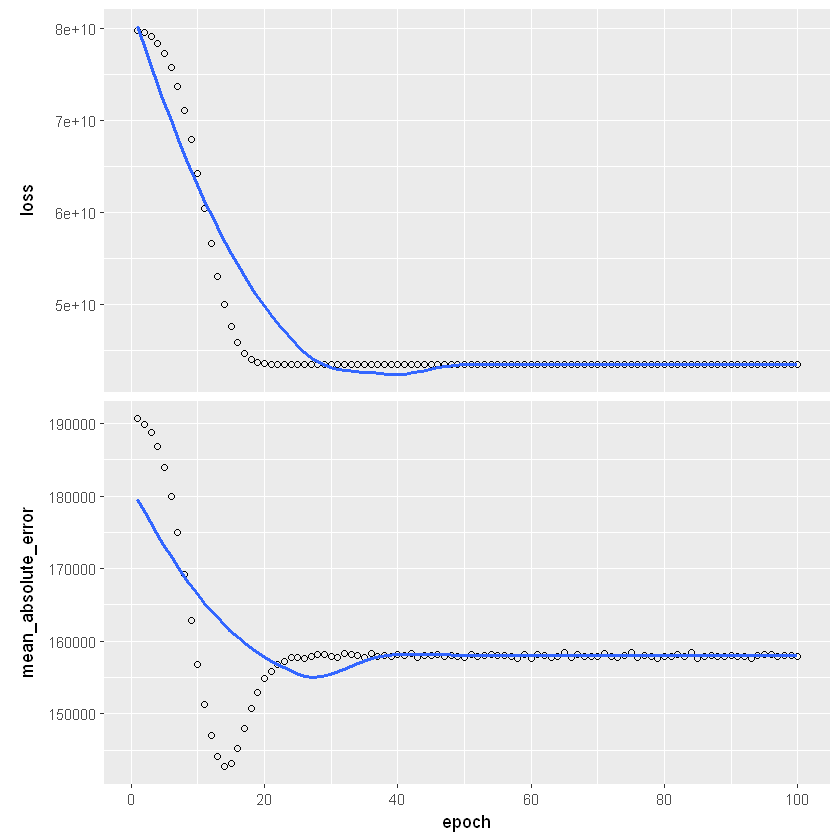

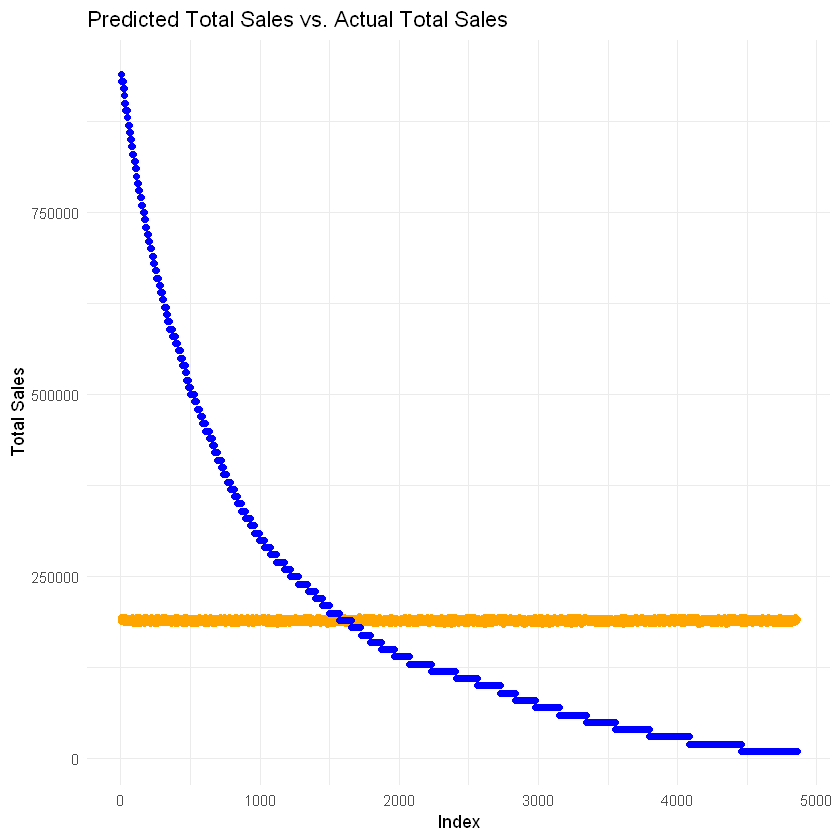

In [230]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 10, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 20, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model with custom absolute error loss and MAE metric
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

  summary (model)

  # Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data$TotalSales), epochs = 100, batch_size = 100, verbose = 1)

plot(history)

# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data$TotalSales)  # Target variable for testing
)


# Print the evaluation metrics
print(eval_metrics)


# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_train))

# Organize results into a data frame
results <- data.frame(Actual_TotalSales = training_data$TotalSales, Predicted_TotalSales = predictions)

# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_TotalSales))) +
  geom_point(aes(y = Predicted_TotalSales), color = "orange") +
  geom_point(aes(y = Actual_TotalSales), color = "blue") +
  labs(x = "Index", y = "Total Sales") +
  ggtitle("Predicted Total Sales vs. Actual Total Sales") +
  theme_minimal()

